# Lending Club Analysis

### <font color='Maroon'>Analysis Working sheet by Shakeeb Pasha and Vishal Khera</font>

In [1]:
# Importing the libraries needed for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup environmental parameters
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1500)

In [2]:
# Loading the file provided
loan_data = pd.read_csv('loan/loan.csv', low_memory=False)
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000         4975.0            36 months   
1  1077430  1314167    2500       2500         2500.0            60 months   
2  1077175  1313524    2400       2400         2400.0            36 months   
3  1076863  1277178    10000      10000        10000.0           36 months   
4  1075358  1311748    3000       3000         3000.0            60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0  10.65%   162.87       B     B2        ... NaN                  
1  15.27%   59.83        C     C4        ... NaN                  
2  15.96%   84.33        C     C5        ... NaN                  
3  13.49%   339.31       C     C1        ... NaN                  
4  12.69%   67.79        B     B5        ... NaN                  

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0 NaN                NaN            NaN                0.0                   
1 NaN                NaN            NaN                0.0                   
2 NaN                NaN            NaN                0.0                   
3 NaN                NaN            NaN                0.0                   
4 NaN                NaN            NaN                0.0                   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0  0.0      NaN             NaN               NaN              
1  0.0      NaN             NaN               NaN              
2  0.0      NaN             NaN               NaN              
3  0.0      NaN             NaN               NaN              
4  0.0      NaN             NaN               NaN              

  total_il_high_credit_limit  
0 NaN                         
1 NaN                         
2 NaN                         
3 NaN                         
4 NaN                         

[5 rows x 111 columns]

In [3]:
loan_data.shape

(39717, 111)

# Data Cleanup and Understanding

In [4]:
# Function to provide missing values % in descending order
def print_missing_value_percentage(df):
    print(round(100 * (df.isna().sum()/len(df.index)), 2))

In [5]:
print('No of columns:', len(loan_data.columns))
print_missing_value_percentage(loan_data)

No of columns: 111
id                                0.00  
member_id                         0.00  
loan_amnt                         0.00  
funded_amnt                       0.00  
funded_amnt_inv                   0.00  
term                              0.00  
int_rate                          0.00  
installment                       0.00  
grade                             0.00  
sub_grade                         0.00  
emp_title                         6.19  
emp_length                        2.71  
home_ownership                    0.00  
annual_inc                        0.00  
verification_status               0.00  
issue_d                           0.00  
loan_status                       0.00  
pymnt_plan                        0.00  
url                               0.00  
desc                              32.58 
purpose                           0.00  
title                             0.03  
zip_code                          0.00  
addr_state                        0.00

In [6]:
# drop columns with 100% missing na values
cleanedup_loan_data = loan_data.dropna(how='all', axis=1, inplace=False)
print('No of columns after dropping columns with 100% missing values:', len(cleanedup_loan_data.columns))

No of columns after dropping columns with 100% missing values: 57


In [7]:
# Lets check on the columns that have data - the quality of the data
cleanedup_loan_data.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05  7456.670694   7187.238670    
min    5.473400e+04  7.069900e+04  500.000000    500.000000     
25%    5.162210e+05  6.667800e+05  5500.000000   5400.000000    
50%    6.656650e+05  8.508120e+05  10000.000000  9600.000000    
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count  39717.000000     39717.000000  3.971700e+04  39717.000000   
mean   10397.448868     324.561922    6.896893e+04  13.315130      
std    7128.450439      208.874874    6.379377e+04  6.678594       
min    0.000000         15.690000     4.000000e+03  0.000000       
25%    5000.000000      167.020000    4.040400e+04  8.170000       
50%    8975.000000      280.220000    5.900000e+04  13.400000      
75%    14400.000000     430.780000    8.230000e+04  18.600000      
max    35000.000000     1305.190000   6.000000e+06  29.990000      

        delinq_2yrs  inq_last_6mths  ...    recoveries  \
count  39717.000000  39717.000000    ...  39717.000000   
mean   0.146512      0.869200        ...  95.221624      
std    0.491812      1.070219        ...  688.744771     
min    0.000000      0.000000        ...  0.000000       
25%    0.000000      0.000000        ...  0.000000       
50%    0.000000      1.000000        ...  0.000000       
75%    0.000000      1.000000        ...  0.000000       
max    11.000000     8.000000        ...  29623.350000   

       collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
count  39717.000000             39717.000000     39661.0                      
mean   12.406112                2678.826162      0.0                          
std    148.671593               4447.136012      0.0                          
min    0.000000                 0.000000         0.0                          
25%    0.000000                 218.680000       0.0                          
50%    0.000000                 546.140000       0.0                          
75%    0.000000                 3293.160000      0.0                          
max    7002.190000              36115.200000     0.0                          

       policy_code  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
count  39717.0      39717.0         39661.0                   39717.0       
mean   1.0          0.0             0.0                       0.0           
std    0.0          0.0             0.0                       0.0           
min    1.0          0.0             0.0                       0.0           
25%    1.0          0.0             0.0                       0.0           
50%    1.0          0.0             0.0                       0.0           
75%    1.0          0.0             0.0                       0.0           
max    1.0          0.0             0.0                       0.0           

       pub_rec_bankruptcies  tax_liens  
count  39020.000000          39678.0    
mean   0.043260              0.0        
std    0.204324              0.0        
min    0.000000              0.0        
25%    0.000000              0.0        
50%    0.000000              0.0        
75%    0.000000              0.0        
max    2.000000              0.0        

[8 rows x 33 columns]

In [8]:
'''
From the above it makes sense to drop 
#   tax_liens, 
#   delinq_amnt, 
#   chargeoff_within_12_mths, 
#   acc_now_delinq, 
#   collections_12_mths_ex_med
as they all have 0 values for all statistical parameters,
which means they all have a 0 value across
'''
cleanedup_loan_data = cleanedup_loan_data.drop(['tax_liens','delinq_amnt', 'chargeoff_within_12_mths','acc_now_delinq', 'collections_12_mths_ex_med'], axis = 1)
cleanedup_loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000         4975.0            36 months   
1  1077430  1314167    2500       2500         2500.0            60 months   
2  1077175  1313524    2400       2400         2400.0            36 months   
3  1076863  1277178    10000      10000        10000.0           36 months   
4  1075358  1311748    3000       3000         3000.0            60 months   

  int_rate  installment grade sub_grade  ... total_rec_late_fee recoveries  \
0  10.65%   162.87       B     B2        ...  0.00               0.00        
1  15.27%   59.83        C     C4        ...  0.00               117.08      
2  15.96%   84.33        C     C5        ...  0.00               0.00        
3  13.49%   339.31       C     C1        ...  16.97              0.00        
4  12.69%   67.79        B     B5        ...  0.00               0.00        

  collection_recovery_fee  last_pymnt_d last_pymnt_amnt next_pymnt_d  \
0  0.00                    Jan-15        171.62          NaN           
1  1.11                    Apr-13        119.66          NaN           
2  0.00                    Jun-14        649.91          NaN           
3  0.00                    Jan-15        357.48          NaN           
4  0.00                    May-16        67.79           Jun-16        

  last_credit_pull_d policy_code application_type pub_rec_bankruptcies  
0  May-16             1           INDIVIDUAL       0.0                  
1  Sep-13             1           INDIVIDUAL       0.0                  
2  May-16             1           INDIVIDUAL       0.0                  
3  Apr-16             1           INDIVIDUAL       0.0                  
4  May-16             1           INDIVIDUAL       0.0                  

[5 rows x 52 columns]

In [9]:
# Get list of columns with single unique values - They dont have any value
cleanedup_loan_data = cleanedup_loan_data[[c for c in cleanedup_loan_data.columns if cleanedup_loan_data[c].nunique() > 1]]
cleanedup_loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000         4975.0            36 months   
1  1077430  1314167    2500       2500         2500.0            60 months   
2  1077175  1313524    2400       2400         2400.0            36 months   
3  1076863  1277178    10000      10000        10000.0           36 months   
4  1075358  1311748    3000       3000         3000.0            60 months   

  int_rate  installment grade sub_grade  ... total_rec_prncp total_rec_int  \
0  10.65%   162.87       B     B2        ...  5000.00         863.16         
1  15.27%   59.83        C     C4        ...  456.46          435.17         
2  15.96%   84.33        C     C5        ...  2400.00         605.67         
3  13.49%   339.31       C     C1        ...  10000.00        2214.92        
4  12.69%   67.79        B     B5        ...  2475.94         1037.39        

  total_rec_late_fee  recoveries collection_recovery_fee last_pymnt_d  \
0  0.00               0.00        0.00                    Jan-15        
1  0.00               117.08      1.11                    Apr-13        
2  0.00               0.00        0.00                    Jun-14        
3  16.97              0.00        0.00                    Jan-15        
4  0.00               0.00        0.00                    May-16        

  last_pymnt_amnt next_pymnt_d last_credit_pull_d pub_rec_bankruptcies  
0  171.62          NaN          May-16             0.0                  
1  119.66          NaN          Sep-13             0.0                  
2  649.91          NaN          May-16             0.0                  
3  357.48          NaN          Apr-16             0.0                  
4  67.79           Jun-16       May-16             0.0                  

[5 rows x 48 columns]

In [10]:
# Remove columns we are not going to use e.g. URL
cleanedup_loan_data = cleanedup_loan_data.drop(['url'], axis = 1)
cleanedup_loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000         4975.0            36 months   
1  1077430  1314167    2500       2500         2500.0            60 months   
2  1077175  1313524    2400       2400         2400.0            36 months   
3  1076863  1277178    10000      10000        10000.0           36 months   
4  1075358  1311748    3000       3000         3000.0            60 months   

  int_rate  installment grade sub_grade  ... total_rec_prncp total_rec_int  \
0  10.65%   162.87       B     B2        ...  5000.00         863.16         
1  15.27%   59.83        C     C4        ...  456.46          435.17         
2  15.96%   84.33        C     C5        ...  2400.00         605.67         
3  13.49%   339.31       C     C1        ...  10000.00        2214.92        
4  12.69%   67.79        B     B5        ...  2475.94         1037.39        

  total_rec_late_fee  recoveries collection_recovery_fee last_pymnt_d  \
0  0.00               0.00        0.00                    Jan-15        
1  0.00               117.08      1.11                    Apr-13        
2  0.00               0.00        0.00                    Jun-14        
3  16.97              0.00        0.00                    Jan-15        
4  0.00               0.00        0.00                    May-16        

  last_pymnt_amnt next_pymnt_d last_credit_pull_d pub_rec_bankruptcies  
0  171.62          NaN          May-16             0.0                  
1  119.66          NaN          Sep-13             0.0                  
2  649.91          NaN          May-16             0.0                  
3  357.48          NaN          Apr-16             0.0                  
4  67.79           Jun-16       May-16             0.0                  

[5 rows x 47 columns]

In [11]:
# drop any duplicate rows
cleanedup_loan_data = cleanedup_loan_data.drop_duplicates(subset=None, keep='first')
cleanedup_loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000         4975.0            36 months   
1  1077430  1314167    2500       2500         2500.0            60 months   
2  1077175  1313524    2400       2400         2400.0            36 months   
3  1076863  1277178    10000      10000        10000.0           36 months   
4  1075358  1311748    3000       3000         3000.0            60 months   

  int_rate  installment grade sub_grade  ... total_rec_prncp total_rec_int  \
0  10.65%   162.87       B     B2        ...  5000.00         863.16         
1  15.27%   59.83        C     C4        ...  456.46          435.17         
2  15.96%   84.33        C     C5        ...  2400.00         605.67         
3  13.49%   339.31       C     C1        ...  10000.00        2214.92        
4  12.69%   67.79        B     B5        ...  2475.94         1037.39        

  total_rec_late_fee  recoveries collection_recovery_fee last_pymnt_d  \
0  0.00               0.00        0.00                    Jan-15        
1  0.00               117.08      1.11                    Apr-13        
2  0.00               0.00        0.00                    Jun-14        
3  16.97              0.00        0.00                    Jan-15        
4  0.00               0.00        0.00                    May-16        

  last_pymnt_amnt next_pymnt_d last_credit_pull_d pub_rec_bankruptcies  
0  171.62          NaN          May-16             0.0                  
1  119.66          NaN          Sep-13             0.0                  
2  649.91          NaN          May-16             0.0                  
3  357.48          NaN          Apr-16             0.0                  
4  67.79           Jun-16       May-16             0.0                  

[5 rows x 47 columns]

## Reusable Functions

In [25]:
# Function to Plot a distribution given a dataframe and column
def head_and_line_plot(df, col, ptitle='Distribution', pxlabel='', pylabel='Count'):
    plt.figure(figsize=(12, 4))
    print(df[[col]].head())
    df[col].value_counts().plot()
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)   
    plt.show()

def head_and_bar_plot(df, col, ptitle='Distribution', pxlabel='', pylabel='Count'):
    plt.figure(figsize=(12, 4))
    print(df[col].value_counts().head())
    sns.countplot(x=col, data=df, order = df[col].value_counts().index)
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel) 
    plt.xticks(rotation=90)
    plt.show()

def head_and_pie_plot(df, col, ptitle='Breakup'):
    plt.figure(figsize=(12, 4))
    print(df[[col]].head())
    df[col].value_counts().plot.pie(autopct='%.1f%%')
    plt.title(ptitle)
    plt.show()

# Univariate Analysis

In [13]:
# List of Columns
cleanedup_loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

#### Variables
![variables](https://i.ibb.co/RTZv36Z/pic1.png)

## Categorical Variables
### Unordered categorical

CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
Name: addr_state, dtype: int64


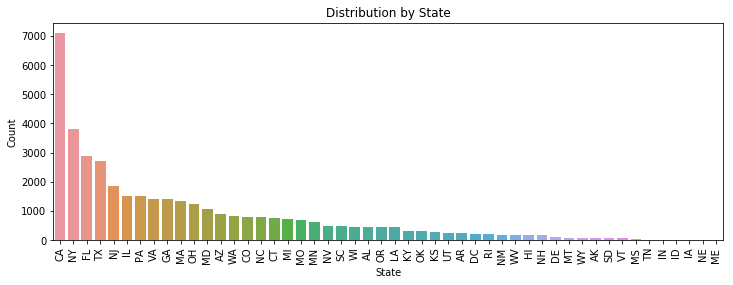

In [26]:
head_and_bar_plot(cleanedup_loan_data, 'addr_state', 'Distribution by State', 'State','Count')

#### <font color='Maroon'>Insights - Majority of the business is in 10 states</font>

Not Verified       16921
Verified           12809
Source Verified    9987 
Name: verification_status, dtype: int64


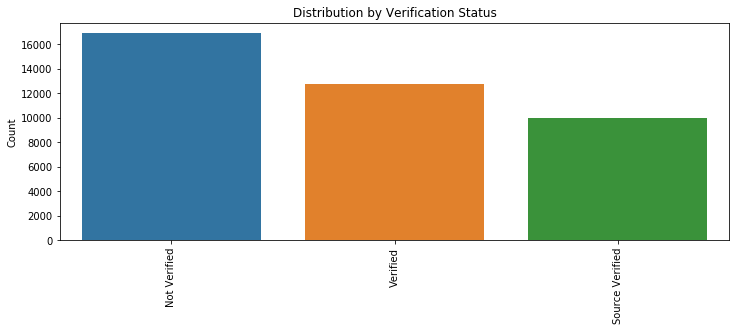

In [28]:
head_and_bar_plot(cleanedup_loan_data, 'verification_status', 'Distribution by Verification Status', '' ,'Count')

#### <font color='Maroon'>Insights - A significant portion of the loans shows are not verified</font>

debt_consolidation    18641
credit_card           5130 
other                 3993 
home_improvement      2976 
major_purchase        2187 
Name: purpose, dtype: int64


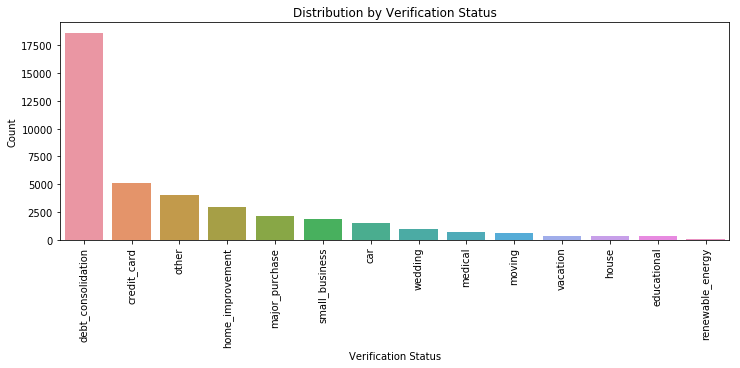

In [30]:
head_and_bar_plot(cleanedup_loan_data, 'purpose','Distribution by Verification Status', 'Verification Status' ,'Count')

#### <font color='Maroon'>Insights - Majority of loans taken are for Debt Consolidation</font>

RENT        18899
MORTGAGE    17659
OWN         3058 
OTHER       98   
NONE        3    
Name: home_ownership, dtype: int64


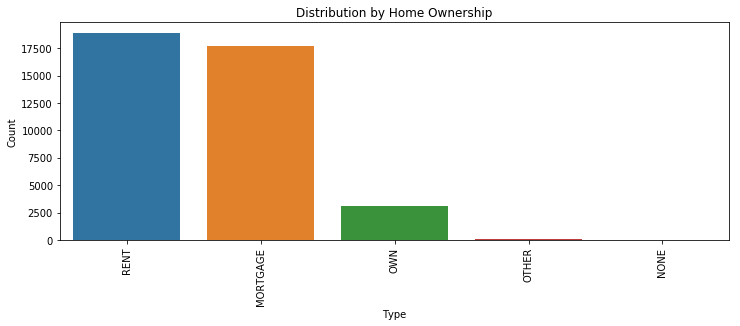

In [31]:
head_and_bar_plot(cleanedup_loan_data, 'home_ownership', 'Distribution by Home Ownership', 'Type' ,'Count')

#### <font color='Maroon'>Insights - Majority of loans taken are by people with rented / mortgaged homes</font>

### Ordered categorical variables

 36 months    29096
 60 months    10621
Name: term, dtype: int64


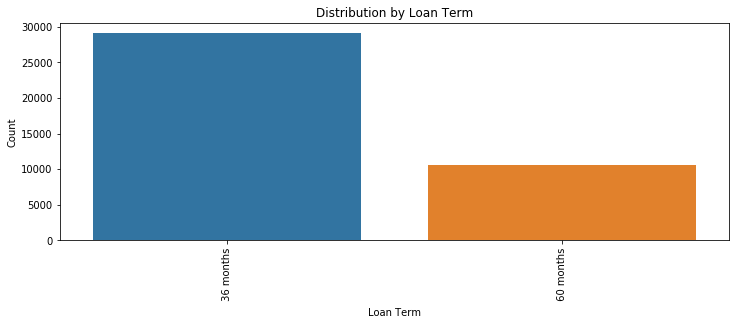

In [32]:
head_and_bar_plot(cleanedup_loan_data, 'term', 'Distribution by Loan Term', 'Loan Term' ,'Count')

In [34]:
#TODO - Check with is NotAvailable coming, it should not be there.

#### <font color='Maroon'>Insights - Almost 75% of the loans are of tenure 36 months</font>

In [35]:
cleanedup_loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [36]:
# Replace the nan values in the table to NotAvailable
cleanedup_loan_data.loc[cleanedup_loan_data['emp_length'].isnull(), 'emp_length'] = 'NotAvailable'
cleanedup_loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years',
       'NotAvailable'], dtype=object)

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
Name: emp_length, dtype: int64


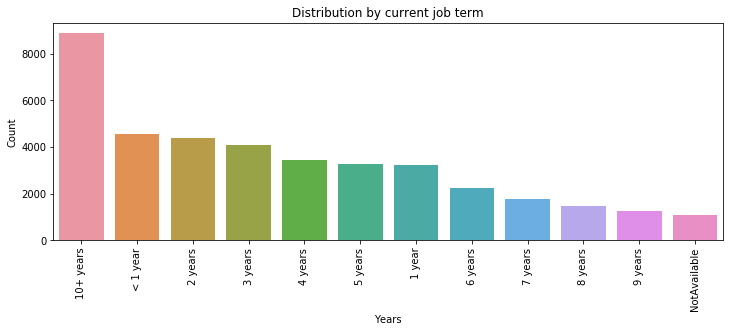

In [37]:
head_and_bar_plot(cleanedup_loan_data, 'emp_length', 'Distribution by current job term', 'Years' ,'Count')

#### <font color='Maroon'>Insights - Majority of Loans are given to people with  jobs. There are close to 1000 people who have not disclosed or are not in jobs</font>

B    12020
A    10085
C    8098 
D    5307 
E    2842 
Name: grade, dtype: int64


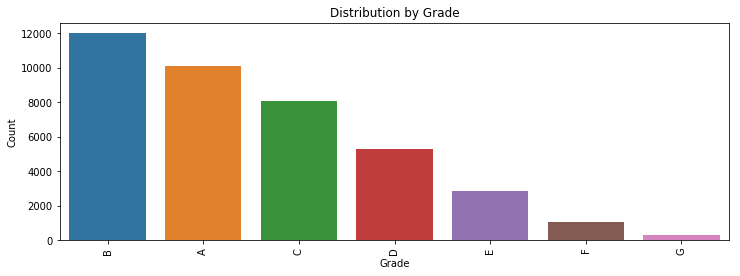

In [38]:
head_and_bar_plot(cleanedup_loan_data, 'grade', 'Distribution by Grade', 'Grade' ,'Count')

#### <font color='Maroon'>Insights - Majority of loans are with A,B and C gradings</font>

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
Name: sub_grade, dtype: int64


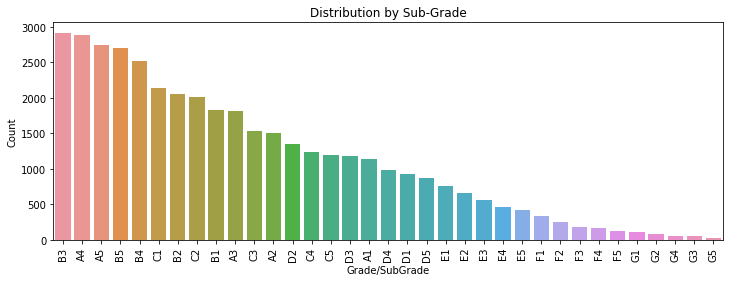

In [39]:
head_and_bar_plot(cleanedup_loan_data, 'sub_grade', 'Distribution by Sub-Grade', 'Grade/SubGrade' ,'Count')

In [40]:
cleanedup_loan_data['emp_title'].value_counts().head()

US Army              134
Bank of America      109
IBM                  66 
AT&T                 59 
Kaiser Permanente    56 
Name: emp_title, dtype: int64

#### <font color='Maroon'>Insights - Employee Title Contains too much text, no processing done on this column</font>

   loan_status
0  Fully Paid 
1  Charged Off
2  Fully Paid 
3  Fully Paid 
4  Current    


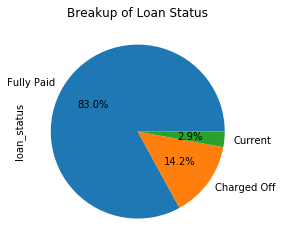

In [41]:
head_and_pie_plot(cleanedup_loan_data, 'loan_status', "Breakup of Loan Status")

#### <font color='Maroon'>Insights - 83.0% of loans have been closed, 14.2% of loans have gone bad</font>


0    37601
1    2056 
2    51   
3    7    
4    2    
Name: pub_rec, dtype: int64


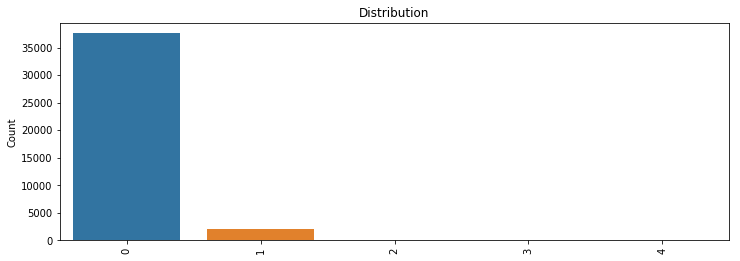

0    37601
1    2056 
2    51   
3    7    
4    2    
Name: pub_rec, dtype: int64

In [42]:
head_and_bar_plot(cleanedup_loan_data, 'pub_rec')

cleanedup_loan_data['pub_rec'].value_counts()
# one public record seems related to the number of defaults as well

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Name: issue_d, dtype: int64


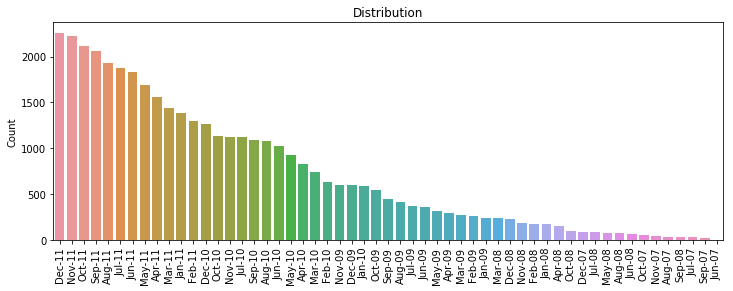

In [43]:
head_and_bar_plot(cleanedup_loan_data, 'issue_d')
# can possibly consider months impact

0    19300
1    10971
2    5812 
3    3048 
4    326  
Name: inq_last_6mths, dtype: int64


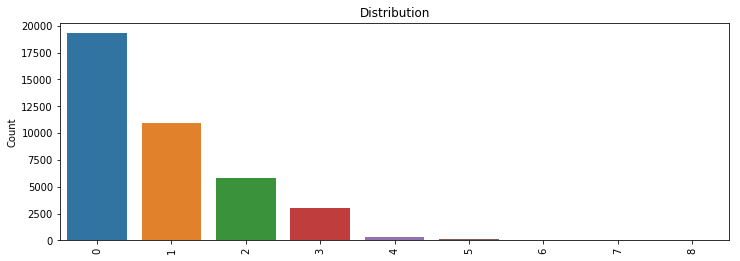

In [44]:
head_and_bar_plot(cleanedup_loan_data, 'inq_last_6mths')
# looks like not many loan applications with more than 4 inquiries were approved

0.0    37339
1.0    1674 
2.0    7    
Name: pub_rec_bankruptcies, dtype: int64


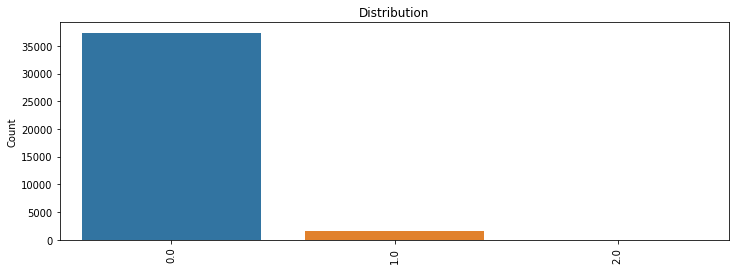

In [45]:
head_and_bar_plot(cleanedup_loan_data, 'pub_rec_bankruptcies')
# majority of loans are for 0 public record bankruptcies, but some given out for people with 1 records

0    35405
1    3303 
2    687  
3    220  
4    62   
Name: delinq_2yrs, dtype: int64


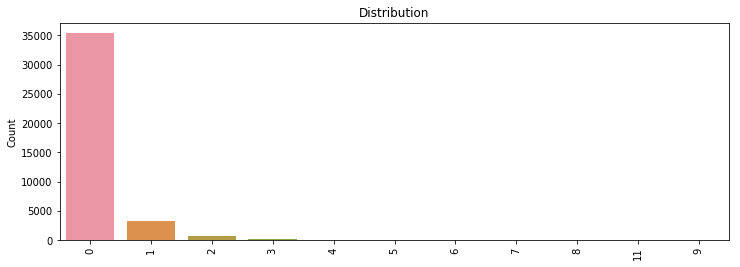

In [46]:
head_and_bar_plot(cleanedup_loan_data, 'delinq_2yrs')
# number 1 corresponds to default rate

7     4018
6     3946
8     3936
9     3718
10    3223
Name: open_acc, dtype: int64


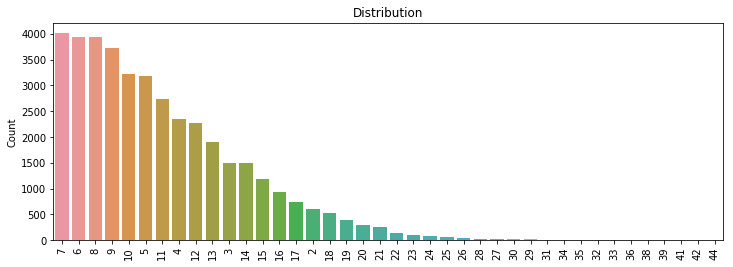

In [47]:
head_and_bar_plot(cleanedup_loan_data, 'open_acc')
# seems like people with 5-10 accs have highest applications

### Continuous variables

In [48]:
# convert percentages to number
cleanedup_loan_data['int_rate'] = cleanedup_loan_data['int_rate'].apply(lambda x : float(x.split('%')[0]))
cleanedup_loan_data['revol_util'] = cleanedup_loan_data['revol_util'].apply(lambda x : float(str(x).split('%')[0]))

In [49]:
cleanedup_loan_data[['int_rate', 'loan_amnt', 'installment', 
                     'revol_bal', 'dti', 'funded_amnt',
                     'revol_util', 'annual_inc']].describe()

int_rate     loan_amnt   installment      revol_bal           dti  \
count  39717.000000  39717.000000  39717.000000  39717.000000   39717.000000   
mean   12.021177     11219.443815  324.561922    13382.528086   13.315130      
std    3.724825      7456.670694   208.874874    15885.016641   6.678594       
min    5.420000      500.000000    15.690000     0.000000       0.000000       
25%    9.250000      5500.000000   167.020000    3703.000000    8.170000       
50%    11.860000     10000.000000  280.220000    8850.000000    13.400000      
75%    14.590000     15000.000000  430.780000    17058.000000   18.600000      
max    24.590000     35000.000000  1305.190000   149588.000000  29.990000      

        funded_amnt    revol_util    annual_inc  
count  39717.000000  39667.000000  3.971700e+04  
mean   10947.713196  48.832152     6.896893e+04  
std    7187.238670   28.332634     6.379377e+04  
min    500.000000    0.000000      4.000000e+03  
25%    5400.000000   25.400000     4.040400e+04  
50%    9600.000000   49.300000     5.900000e+04  
75%    15000.000000  72.400000     8.230000e+04  
max    35000.000000  99.900000     6.000000e+06

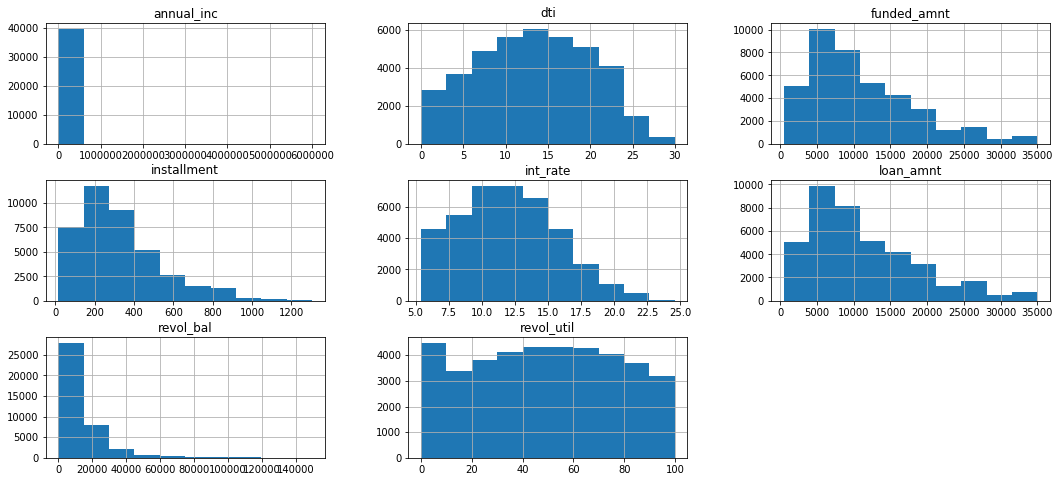

In [50]:
cleanedup_loan_data[['int_rate', 'loan_amnt', 'installment', 
                     'revol_bal', 'dti', 'funded_amnt',
                     'revol_util', 'annual_inc']].hist(figsize=(18,8))
plt.show()

In [51]:
# visualize outlier removal
def box_plot_remove_outlier(df, col, val):
    plt.figure(figsize=(12, 6))
    print(f'{col} : outlier cutoff={val}')
    df[[col]].plot.box(ax=plt.subplot(121))
    df[df[col] <= val][col].plot.box(ax=plt.subplot(122))
    plt.show()

int_rate : outlier cutoff=22


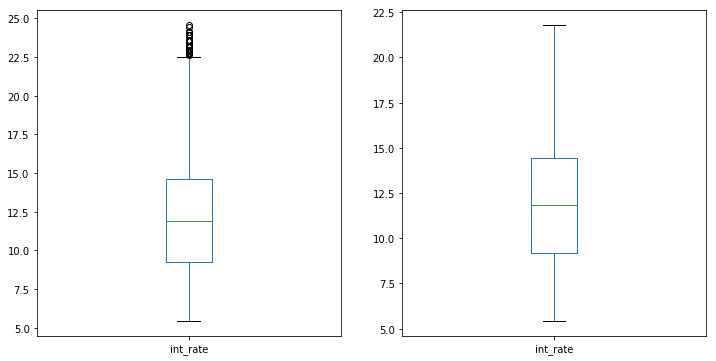

loan_amnt : outlier cutoff=28000


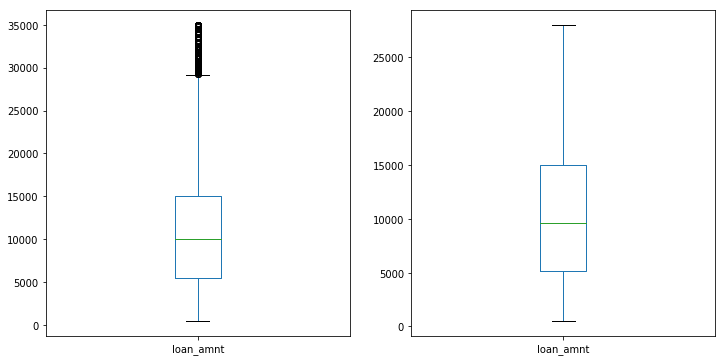

installment : outlier cutoff=750


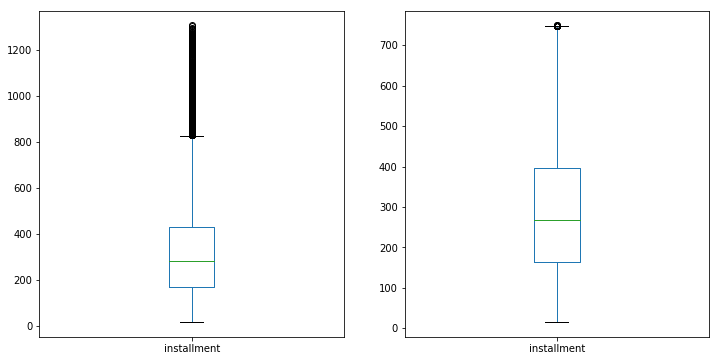

revol_bal : outlier cutoff=28000


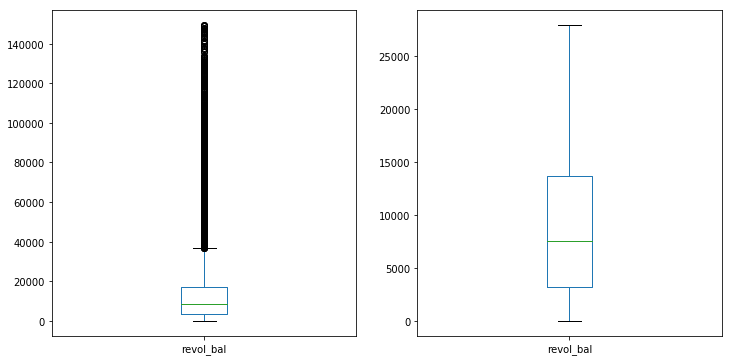

dti : outlier cutoff=30


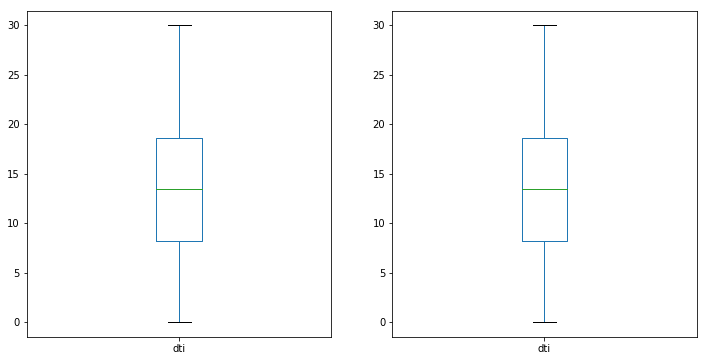

funded_amnt : outlier cutoff=30000


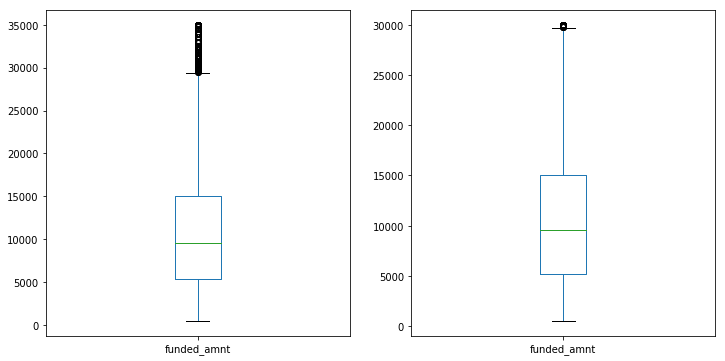

revol_util : outlier cutoff=100


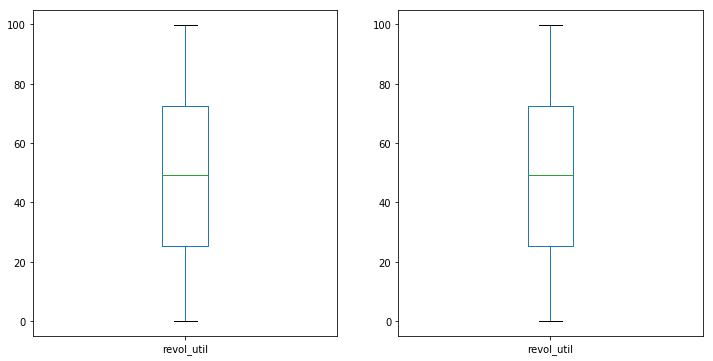

annual_inc : outlier cutoff=82300.0


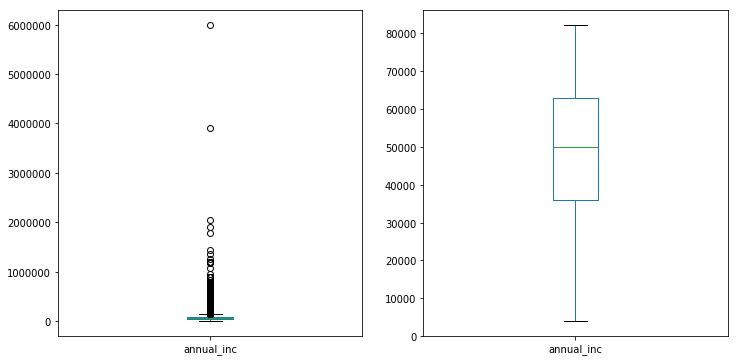

In [52]:
outlier_maps = {'int_rate': 22, # dont want to apply outlier treatment
                'loan_amnt': 28000,
                'installment': 750, 
                'revol_bal': 28000, 
                'dti': 30, 
                'funded_amnt': 30000,
                'revol_util': 100, 
                'annual_inc': 8.230000e+04}
for col, val in outlier_maps.items():
    box_plot_remove_outlier(cleanedup_loan_data, col, val)

# Segemented Univariate Analysis
Loan processing being the key objective we are looking at 2 kinds of analysis. Defaulted loans and Good or paid up loans. The Loans that are currently active will be excluded from the study

In [64]:
# Reusable Functions

def group_and_default_rate(col, ptitle='Defaults Distribution', pxlabel='', pylabel='Percent'):
    # Set labels
    pylabel='Percent'
    py2label = 'Count of Bad Loans'

    # Process Information
    p_table = cleanedup_loan_data.groupby([col, 'loan_status']).count()[['id']]
    p_table = p_table.reset_index()
    totals_table = p_table.groupby(col).sum()
    p_table['totals'] = p_table[col].apply(lambda x : totals_table.loc[x]['id'])
    p_table['rate'] = round(100*(p_table['id']/p_table['totals']))

    # Plot Column chart of col Left hand chart 
    p_table_top50 = p_table[p_table['loan_status'] == 'Charged Off'][[col,'totals', 'id',  'rate']] \
            .sort_values('rate', ascending=False) \
            .head(50) \
            .reset_index(drop=True)
    
    plt.figure(figsize=(18, 6))
    sns.barplot(x=col, y='rate', data=p_table_top50, label='% Bad Loans', order=p_table_top50[col])
    
    plt.xticks(rotation=90)
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)   
    # Plot Charged off loans guideline i.e. 14% 
    plt.axhline(y=14, linewidth=1.00, color='r', ls='--')

    # Hack to add 2nd Chart legend to primary and we supress the 2nd
    plt.plot(np.nan, color='tab:green', label = 'Count of Bad Loans')
    plt.plot(np.nan, color='tab:red',ls='--', label = 'Average % of Bad Loans')
    plt.legend()

    # Create 2nd line chart of count count of corresponding bad loans - Right hand chart 
    plt2 = plt.twinx()  # instantiate a second axes that shares the same x-axis
    plt2.tick_params(axis='y', labelcolor='tab:green')
    sns.pointplot(x=col, y='id', data=p_table_top50, color='tab:green', marker='o', ax=plt2, label='Count', order=p_table_top50[col])
    plt2.set_ylabel(py2label, color='tab:green')  # we already handled the x-label with ax1

    plt.show()

    print(p_table_top50.head())

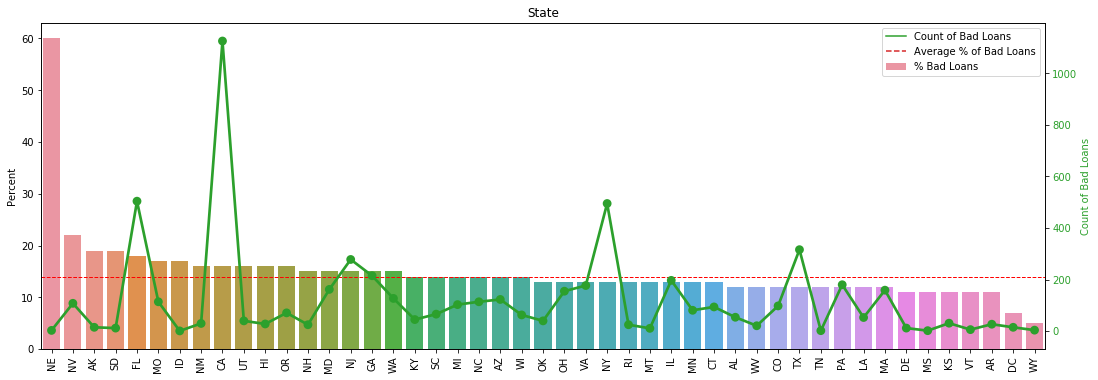

  addr_state  totals   id  rate
0  NE         5       3    60.0
1  NV         497     108  22.0
2  AK         80      15   19.0
3  SD         64      12   19.0
4  FL         2866    504  18.0


In [65]:
# is there any relation w.r.t addr_state and default rate
group_bar_and_line_and_default_rate('addr_state', 'State')

# Nebraska and Nevada have unusually high rate of defaults

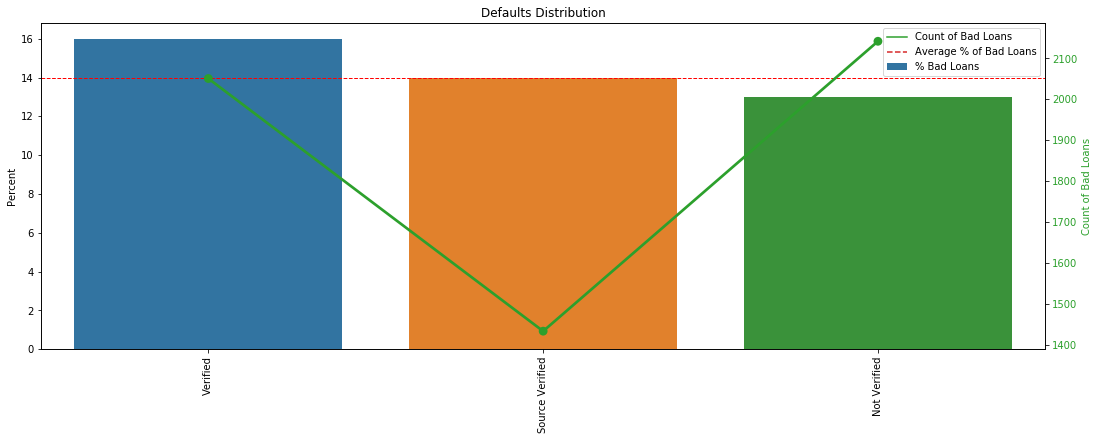

  verification_status  totals    id  rate
0  Verified            12809   2051  16.0
1  Source Verified     9987    1434  14.0
2  Not Verified        16921   2142  13.0


In [66]:
# is there any relation w.r.t verification_status and default rate
group_and_default_rate('verification_status')
# not much difference, infact verified applicants have higher default rate!

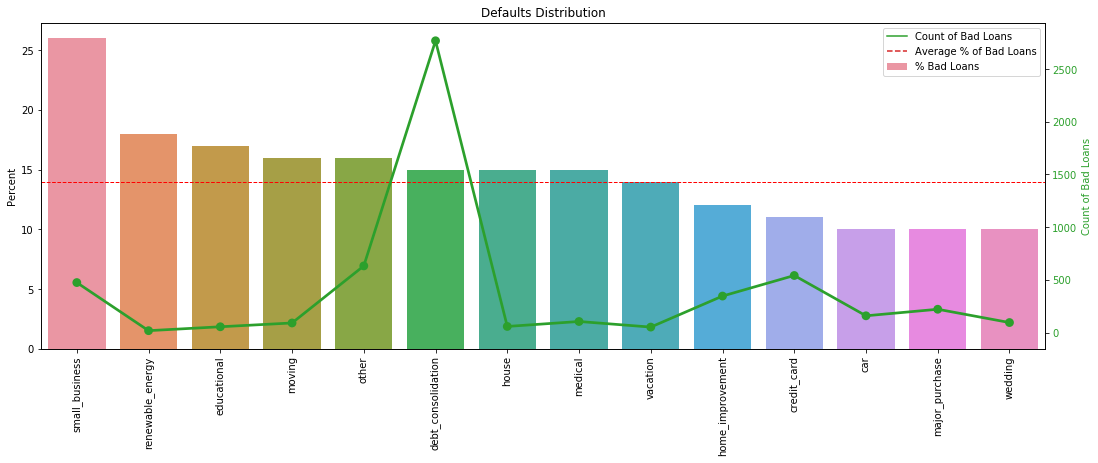

            purpose  totals   id  rate
0  small_business    1828    475  26.0
1  renewable_energy  103     19   18.0
2  educational       325     56   17.0
3  moving            583     92   16.0
4  other             3993    633  16.0


In [67]:
# is there any relation w.r.t purpose of loan and default rate
group_and_default_rate('purpose')
# very IMP - small_business loans have higher share of default rates

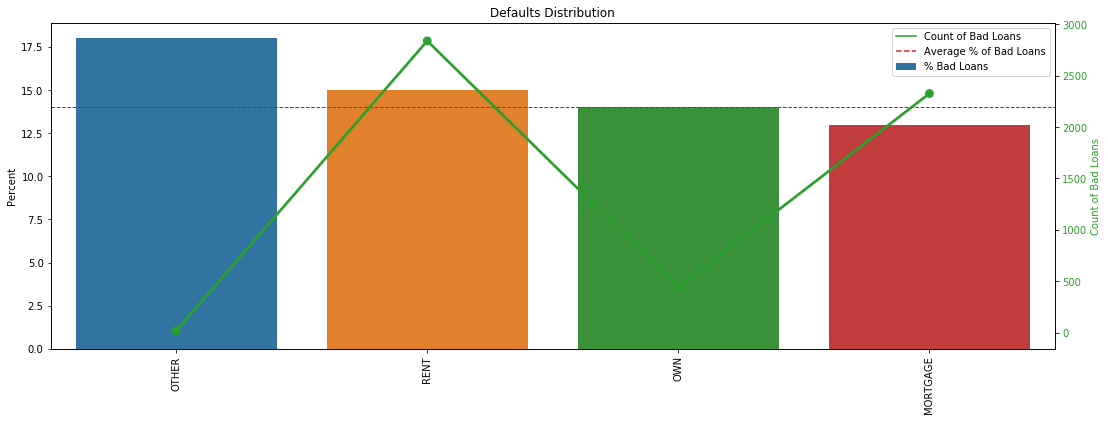

  home_ownership  totals    id  rate
0  OTHER          98      18    18.0
1  RENT           18899   2839  15.0
2  OWN            3058    443   14.0
3  MORTGAGE       17659   2327  13.0


In [68]:
# is there any relation w.r.t home_ownership and default rate
group_and_default_rate('home_ownership')
# not sure what others refer to. But people with mortgage have less rate.

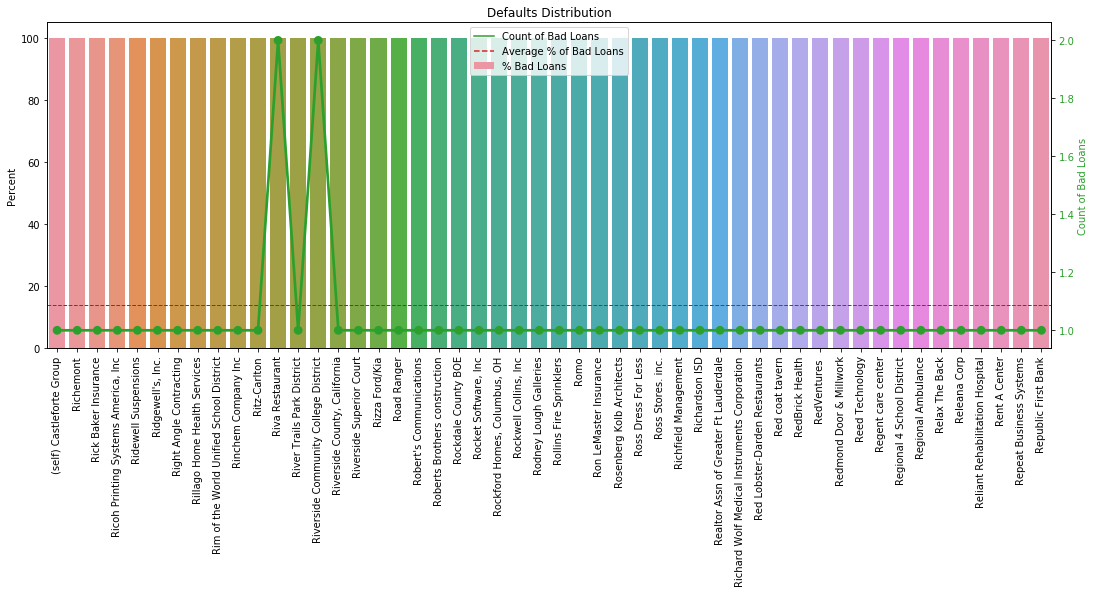

                             emp_title  totals  id   rate
0  (self) Castleforte Group             1       1   100.0
1  Richemont                            1       1   100.0
2  Rick Baker Insurance                 1       1   100.0
3  Ricoh Printing Systems America, Inc  1       1   100.0
4  Ridewell Suspensions                 1       1   100.0


In [69]:
# is there any relation w.r.t home_ownership and default rate
group_and_default_rate('emp_title')
# looks like people have 100% default rate from specific companies.

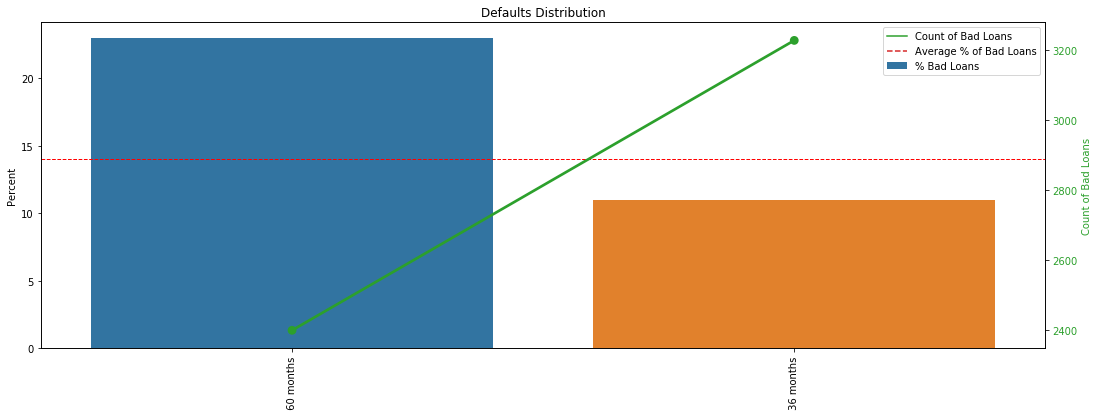

         term  totals    id  rate
0   60 months  10621   2400  23.0
1   36 months  29096   3227  11.0


In [70]:
# is there any relation w.r.t term and default rate
group_and_default_rate('term')
# longer duration loans have higher default rate

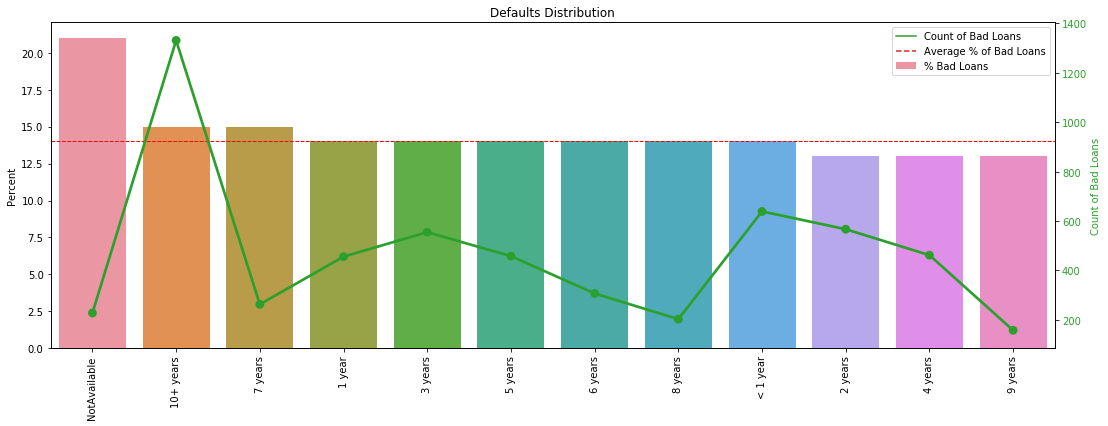

     emp_length  totals    id  rate
0  NotAvailable  1075    228   21.0
1  10+ years     8879    1331  15.0
2  7 years       1773    263   15.0
3  1 year        3240    456   14.0
4  3 years       4095    555   14.0


In [71]:
# is there any relation w.r.t emp_length and default rate
group_and_default_rate('emp_length')
# not much relation.

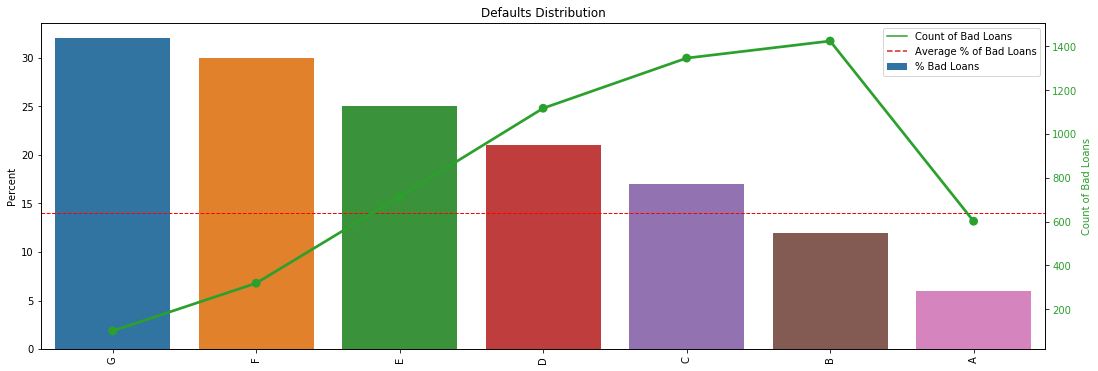

  grade  totals    id  rate
0  G     316     101   32.0
1  F     1049    319   30.0
2  E     2842    715   25.0
3  D     5307    1118  21.0
4  C     8098    1347  17.0


In [72]:
# is there any relation w.r.t grade and default rate
group_and_default_rate('grade')
# Only A and to some extent B grades are better performers.

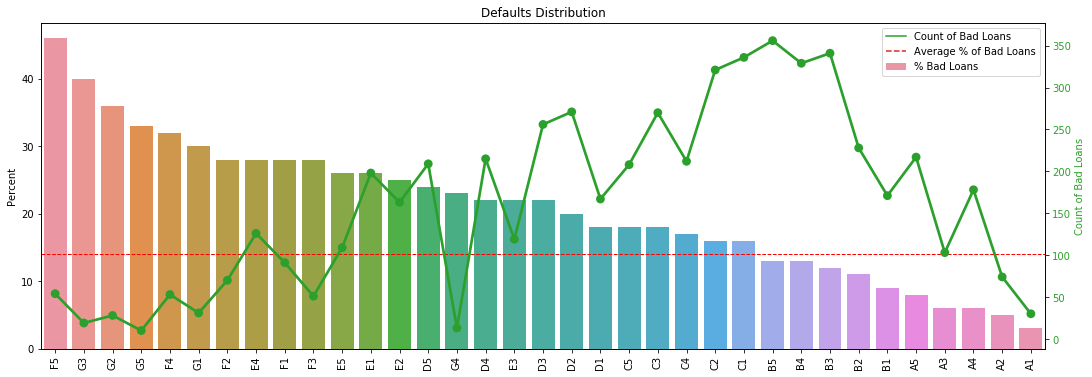

  sub_grade  totals  id  rate
0  F5        118     54  46.0
1  G3        48      19  40.0
2  G2        78      28  36.0
3  G5        30      10  33.0
4  F4        168     53  32.0


In [73]:
# is there any relation w.r.t sub_grade and default rate
group_and_default_rate('sub_grade')
# some sub grades have out of norm performances.

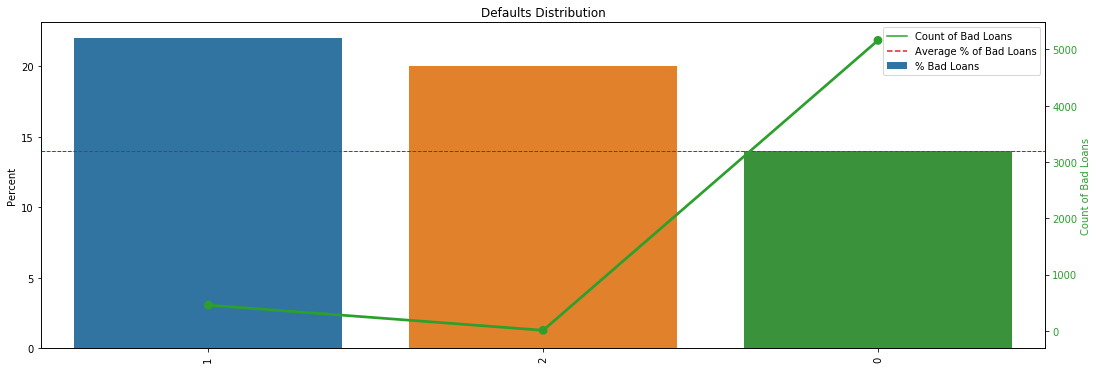

   pub_rec  totals    id  rate
0  1        2056    457   22.0
1  2        51      10    20.0
2  0        37601   5160  14.0


In [74]:
# is there any relation w.r.t pub_rec and default rate
group_and_default_rate('pub_rec')
# on expected lines - people with 1/2 pub_recs have higher default rate.

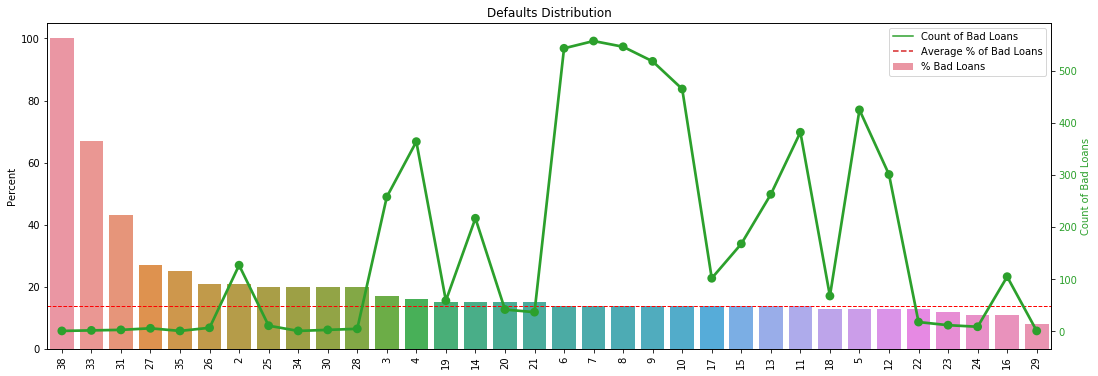

   open_acc  totals  id   rate
0  38        1       1   100.0
1  33        3       2   67.0 
2  31        7       3   43.0 
3  27        22      6   27.0 
4  35        4       1   25.0 


In [76]:
# is there any relation w.r.t open_acc and default rate
group_and_default_rate('open_acc')
# not sure what to make out of it.

### Bivariate Analysis

In [77]:
bivariate_loan_data = cleanedup_loan_data[['addr_state', 'verification_status', 'purpose', 'home_ownership',
                                           'emp_title', 'term', 'emp_length', 'grade', 'sub_grade',
                                           'loan_status', 'pub_rec', 'issue_d', 'inq_last_6mths',
                                           'pub_rec_bankruptcies', 'delinq_2yrs', 'open_acc',
                                           'int_rate', 'loan_amnt', 'installment', 'revol_bal',
                                           'dti', 'funded_amnt', 'revol_util', 'annual_inc']]
bivariate_loan_data.head()

addr_state verification_status         purpose home_ownership  \
0  AZ         Verified            credit_card     RENT            
1  GA         Source Verified     car             RENT            
2  IL         Not Verified        small_business  RENT            
3  CA         Source Verified     other           RENT            
4  OR         Source Verified     other           RENT            

                  emp_title        term emp_length grade sub_grade  \
0  NaN                        36 months  10+ years  B     B2         
1  Ryder                      60 months  < 1 year   C     C4         
2  NaN                        36 months  10+ years  C     C5         
3  AIR RESOURCES BOARD        36 months  10+ years  C     C1         
4  University Medical Group   60 months  1 year     B     B5         

   loan_status  ...  delinq_2yrs open_acc  int_rate  loan_amnt  installment  \
0  Fully Paid   ...  0            3        10.65     5000       162.87        
1  Charged Off  ...  0            3        15.27     2500       59.83         
2  Fully Paid   ...  0            2        15.96     2400       84.33         
3  Fully Paid   ...  0            10       13.49     10000      339.31        
4  Current      ...  0            15       12.69     3000       67.79         

   revol_bal    dti  funded_amnt  revol_util  annual_inc  
0  13648      27.65  5000         83.7        24000.0     
1  1687       1.00   2500         9.4         30000.0     
2  2956       8.72   2400         98.5        12252.0     
3  5598       20.00  10000        21.0        49200.0     
4  27783      17.94  3000         53.9        80000.0     

[5 rows x 24 columns]

/home/shakeeb/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shakeeb/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


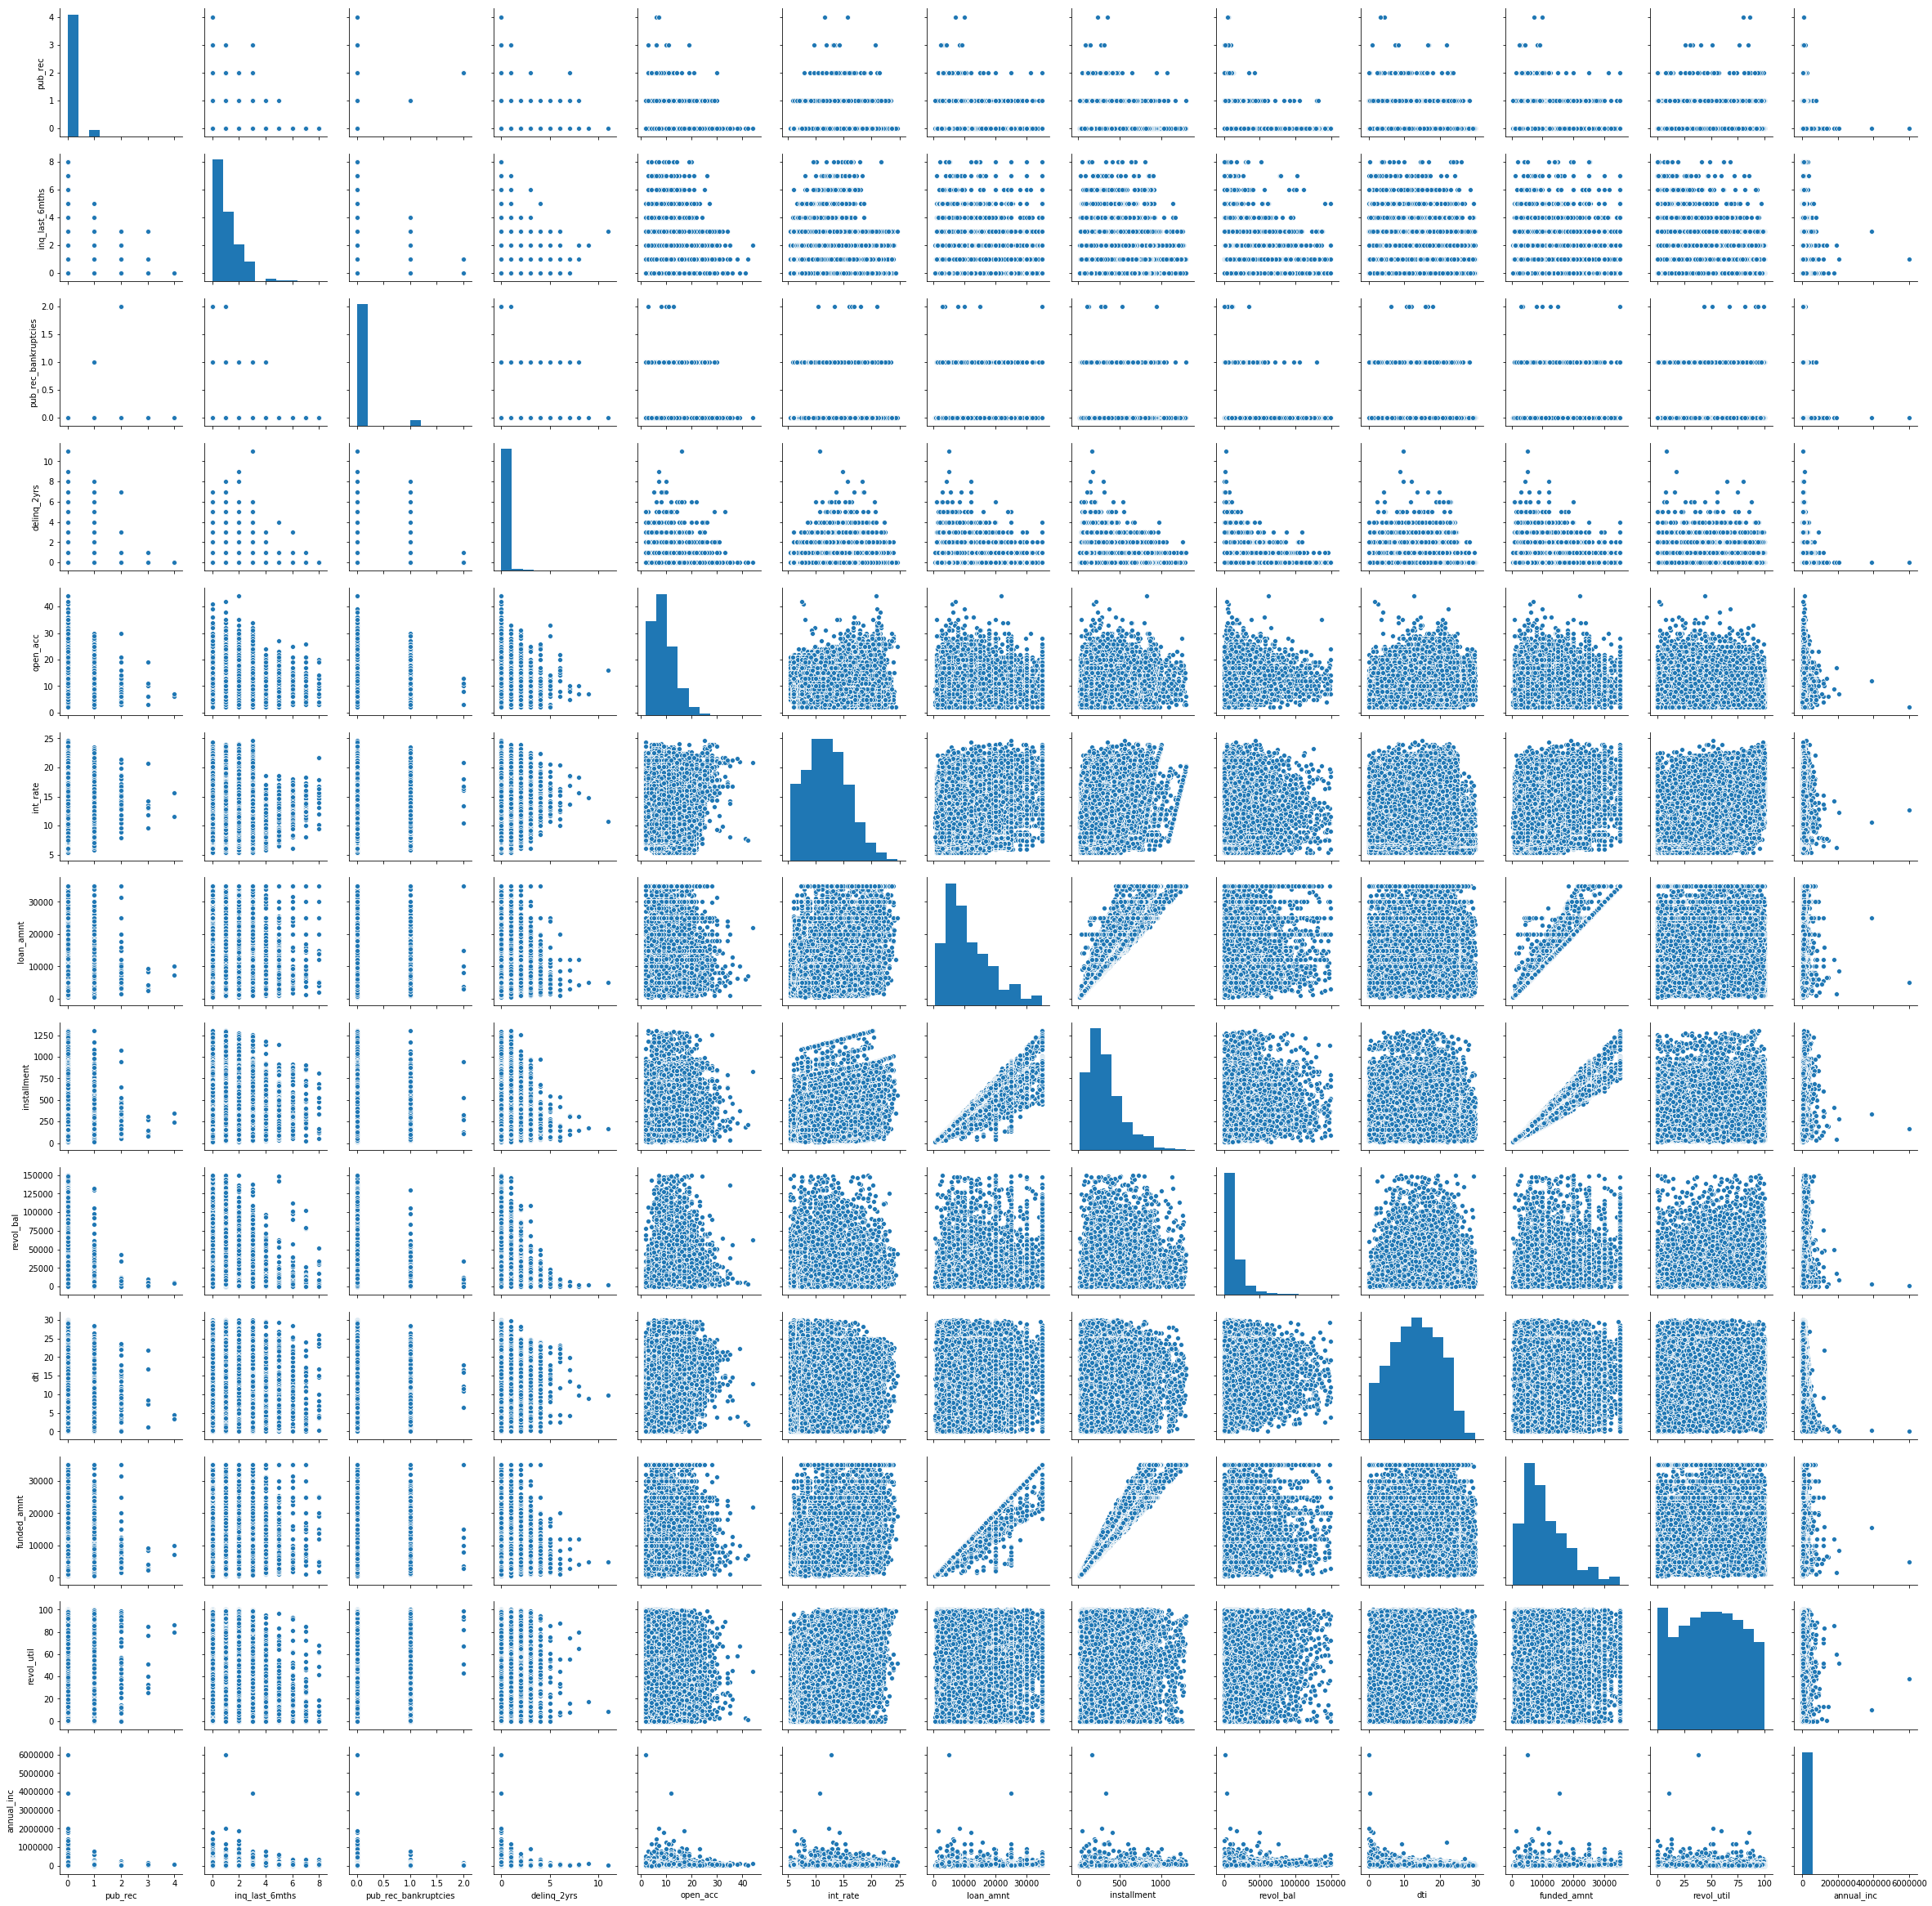

In [78]:
#sns.pairplot(bivariate_loan_data)

In [79]:
bivariate_loan_data[['int_rate', 'loan_status']].head()

int_rate  loan_status
0  10.65     Fully Paid 
1  15.27     Charged Off
2  15.96     Fully Paid 
3  13.49     Fully Paid 
4  12.69     Current

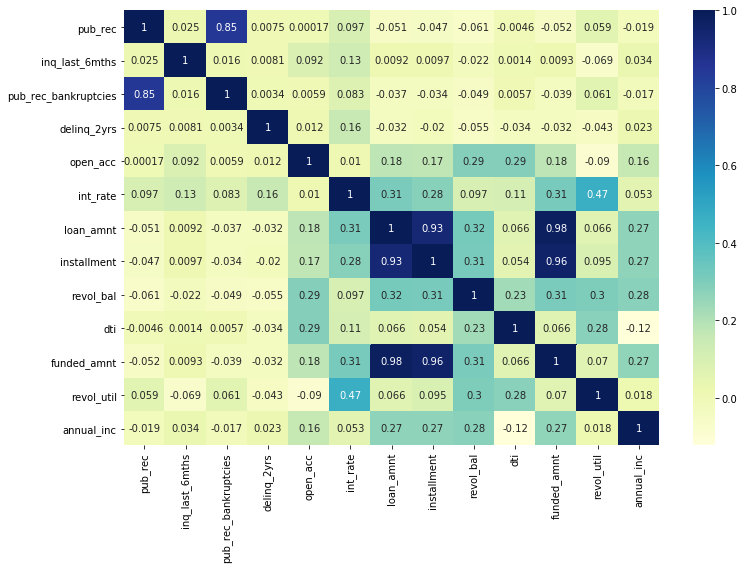

In [115]:
plt.figure(figsize=(12, 8))
sns.heatmap(bivariate_loan_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

# pub_rec and pub_rec_bankruptcies are highly correlated, we could drop one of them
# loan_amount, installment, funded_amount also are highly correlated, pick one

In [81]:
# dti - debt(excluding current loan)/income and installment vs loan_status

In [82]:
def heat_map_bivariate(cols, size=(12, 4)):
    # grade and term vs loan_status
    p_table = cleanedup_loan_data.groupby(cols+['loan_status']).count()[['id']]
    # p_table = p_table.reset_index()
    totals_table = p_table.groupby(cols).sum()

    p_table = p_table.join(totals_table, how='inner', rsuffix="l_").reset_index()
    p_table = p_table.rename(columns={'idl_':'total', 'id':'count'})
    # p_table.head()

    p_table['rate'] = round(100*(p_table['count']/p_table['total']))
    # p_table.head()

    df = p_table.pivot_table(values='rate',index='loan_status',columns=cols)
    # df.head()

    plt.figure(figsize=size)
    sns.heatmap(df, cmap="YlGnBu", annot=True)
    plt.show()

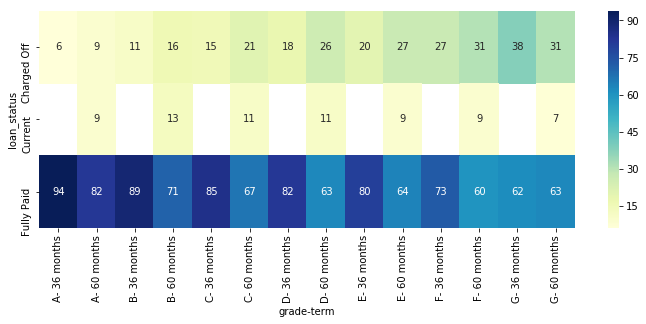

In [83]:
heat_map_bivariate(['grade', 'term'])
# Grade G with 36 months term has higher default rate

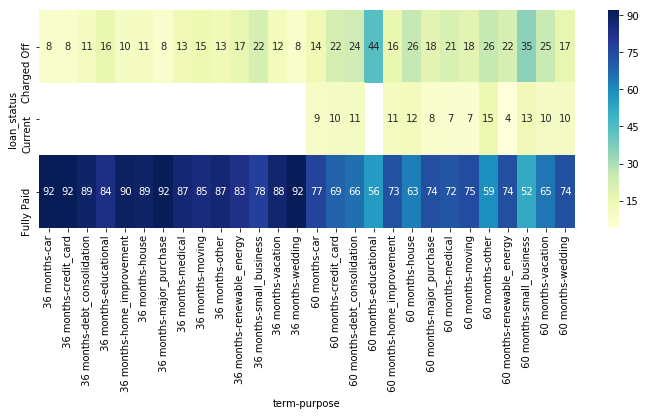

In [84]:
heat_map_bivariate(['term', 'purpose'])
# riskier loans - 60months-educational, 60months-small_business

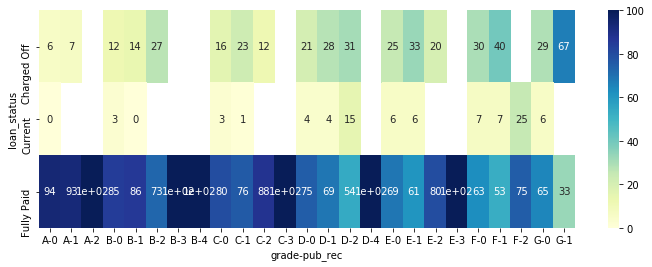

In [85]:
heat_map_bivariate(['grade', 'pub_rec'])
# G with 1 rec, F with 1 rec
# very interesting - gaps in charged off - means no default - 3,4 rec - reformed?

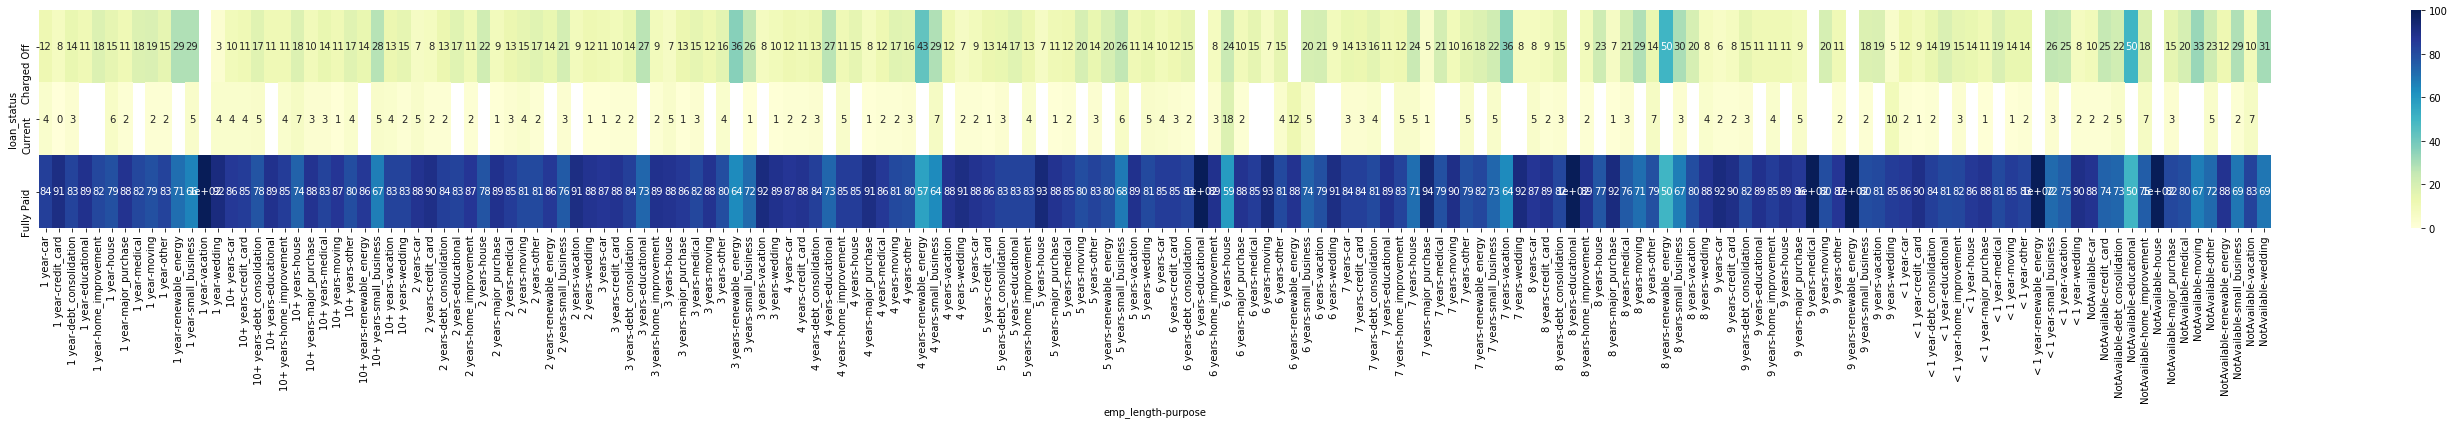

In [86]:
heat_map_bivariate(['emp_length', 'purpose'], size=(50, 4))
# interesting - 7years - vacation!
# buying house with 6years exp

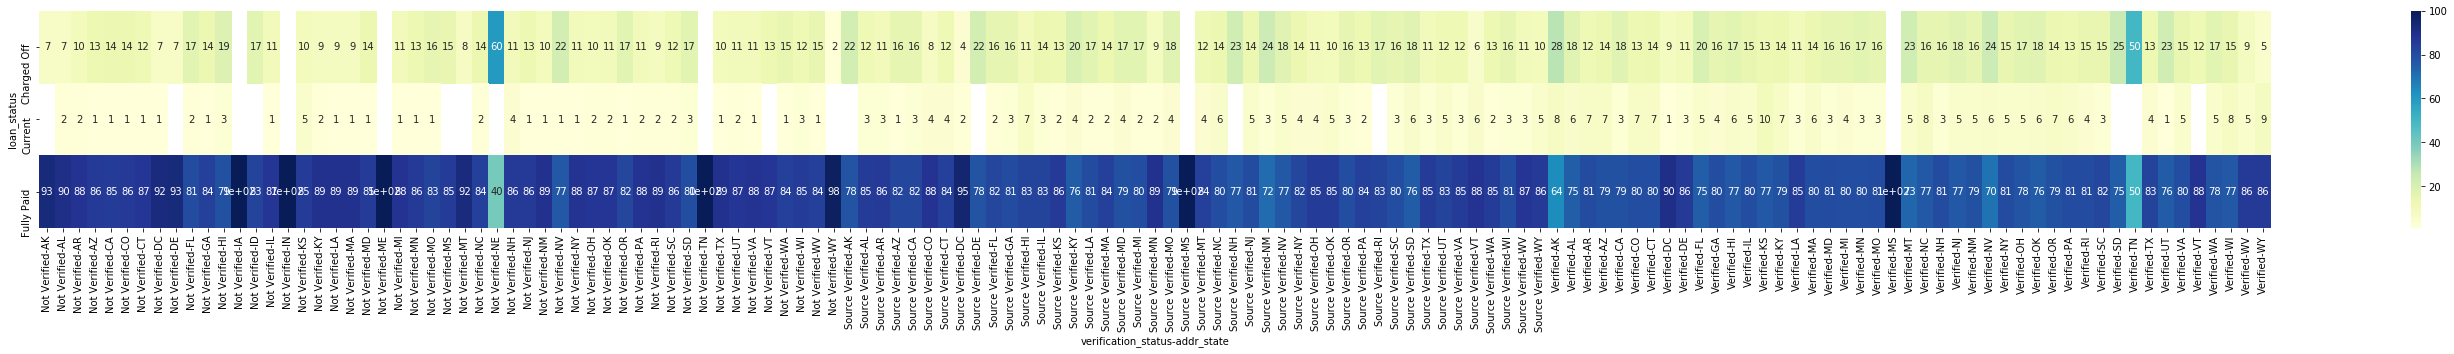

In [87]:
heat_map_bivariate(['verification_status', 'addr_state'], size=(50, 4))
# not verified in nebraska - high risk
# verified in tenneessee - high risk - insider play :) ?

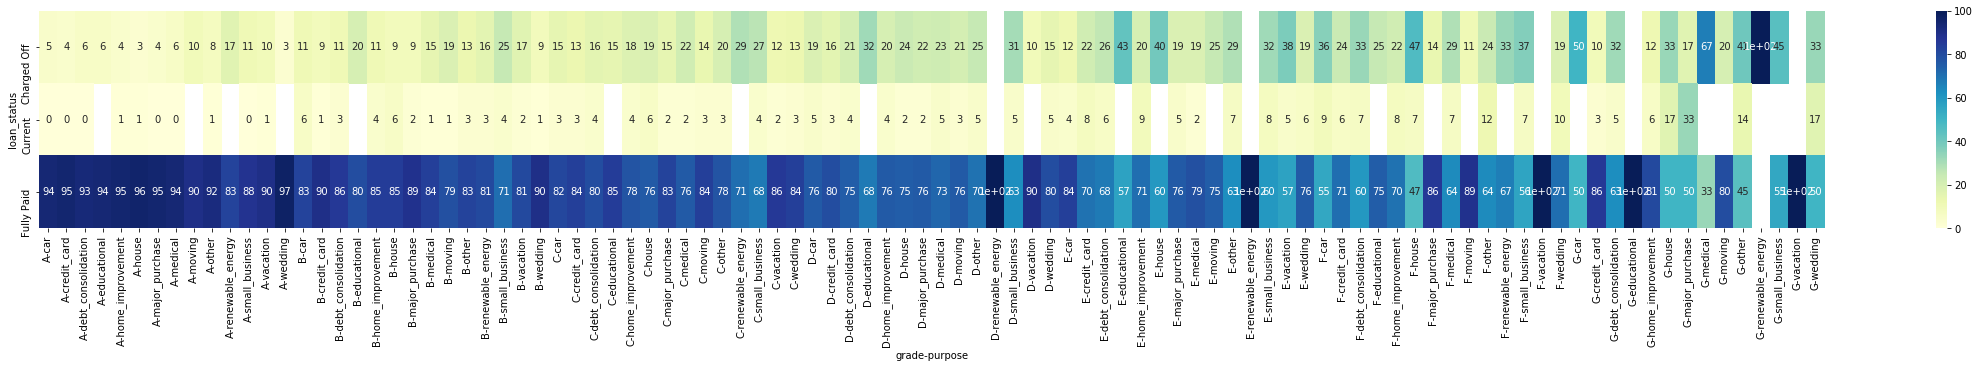

In [88]:
heat_map_bivariate(['grade', 'purpose'], size=(40, 4))
# G-renewable energy - 100% default!
# G - medical, car, F-house
# G - vacation is least risky!
# This looks like very imp insight

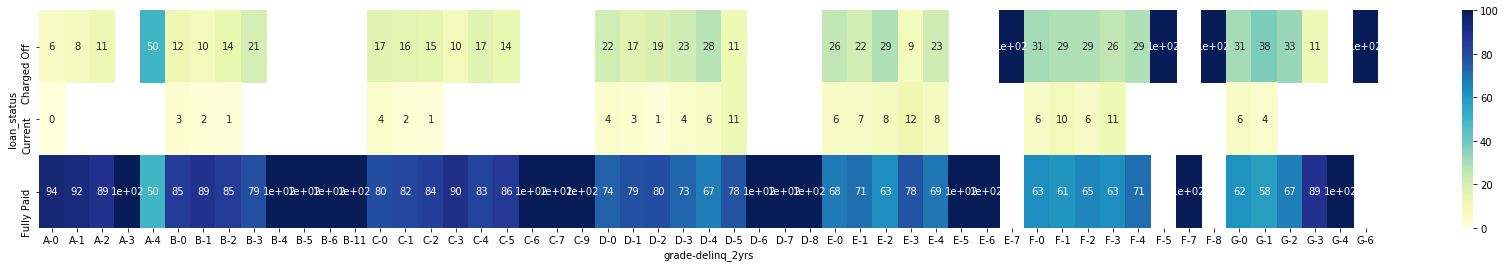

In [89]:
heat_map_bivariate(['grade', 'delinq_2yrs'], size=(30, 4))
# A grade with 4 delinqencies

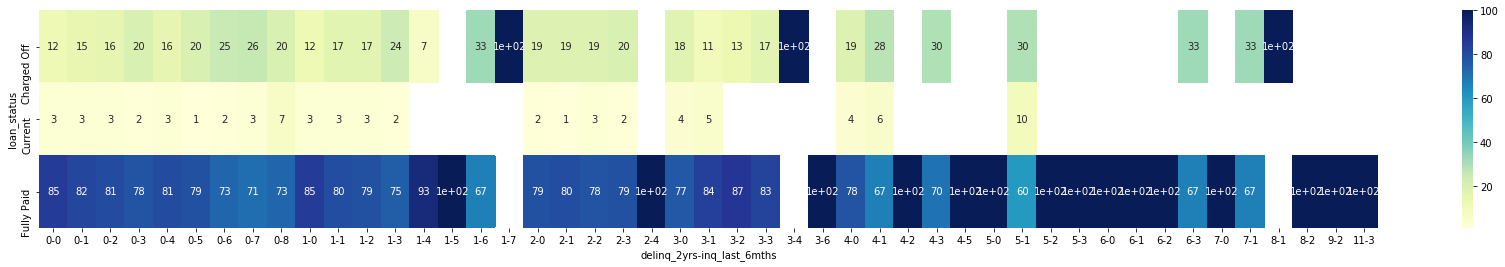

In [90]:
heat_map_bivariate(['delinq_2yrs', 'inq_last_6mths'], size=(30, 4))

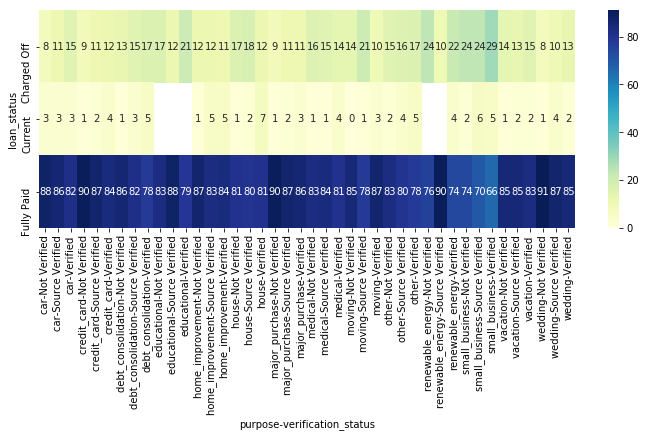

In [91]:
heat_map_bivariate(['purpose', 'verification_status'])
# renewable and moving - source verified is risky

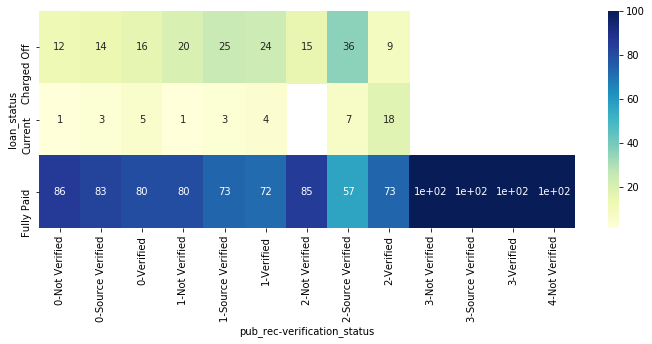

In [92]:
heat_map_bivariate(['pub_rec', 'verification_status'])
# anyway more than pub_rec are generally safe and 2 with verified status is also safe?

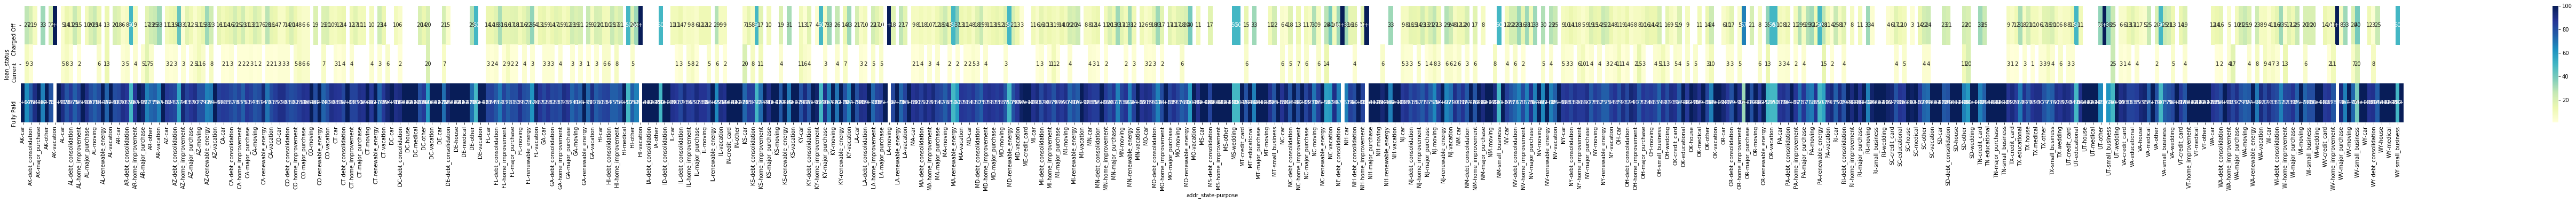

In [93]:
heat_map_bivariate(['addr_state', 'purpose'], size=(100, 4))
# figure out how to display this, seems to have some good info

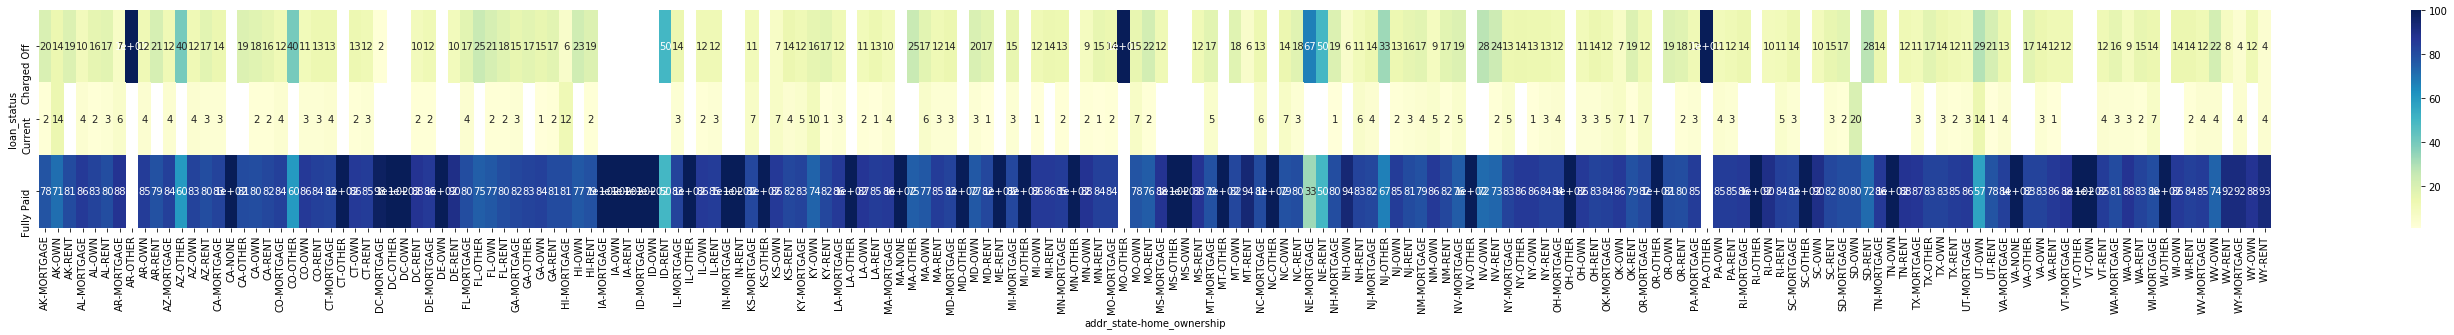

In [94]:
heat_map_bivariate(['addr_state', 'home_ownership'], size=(50, 4))
# ID - rental have high rate

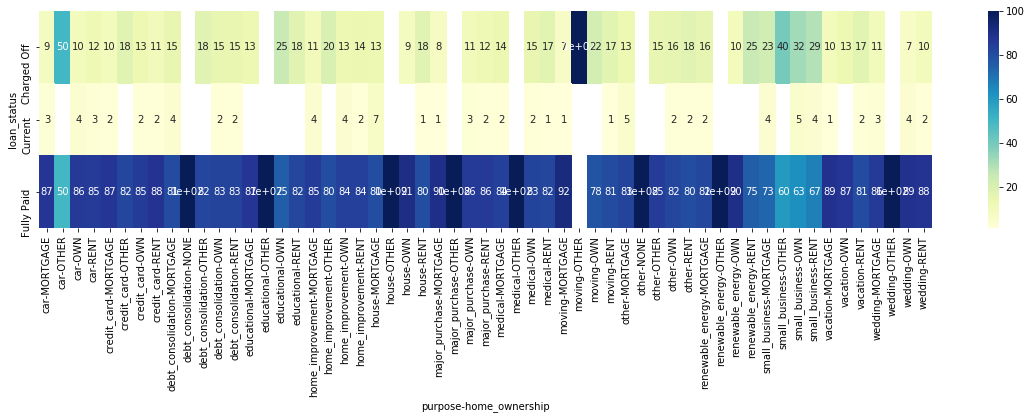

In [95]:
heat_map_bivariate(['purpose', 'home_ownership'], size=(20, 4))
# home improvemnt loan and other - what does it mean?

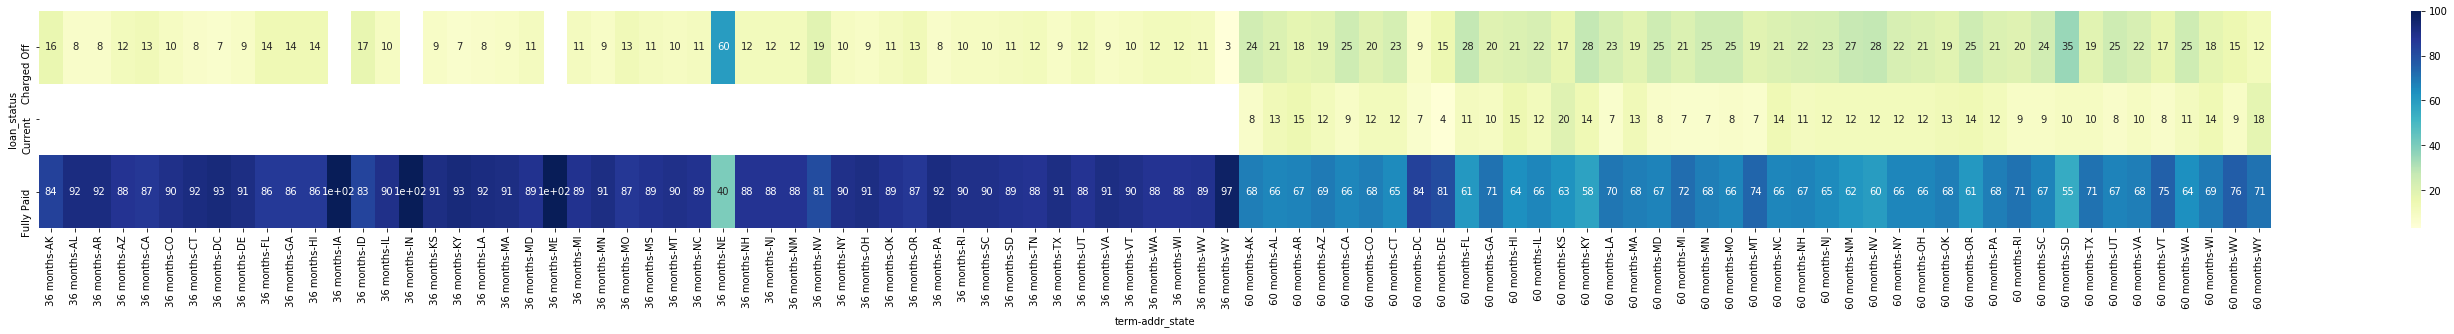

In [96]:
heat_map_bivariate(['term', 'addr_state'], size=(50, 4))
# 36 months term in nebraska is risky

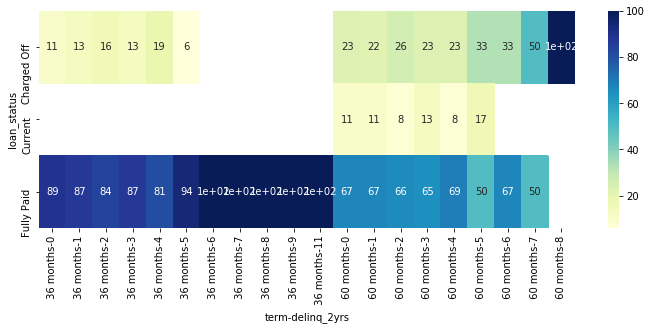

In [97]:
heat_map_bivariate(['term', 'delinq_2yrs'])
# for 36 term - more number of delinq - less rate
# for 60months inverse of above

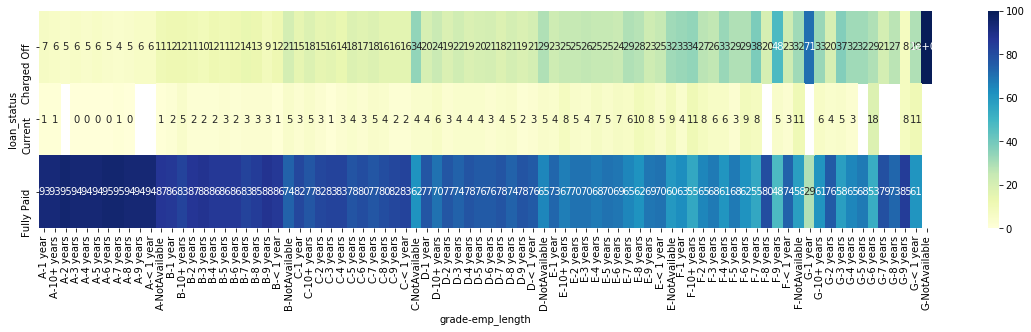

In [98]:
heat_map_bivariate(['grade', 'emp_length'], size=(20, 4))
# 1year - G - risky

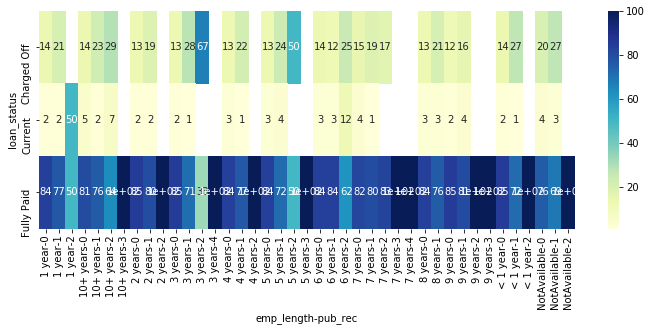

In [99]:
heat_map_bivariate(['emp_length', 'pub_rec'])
# 3 and 5 years - 2pub rec

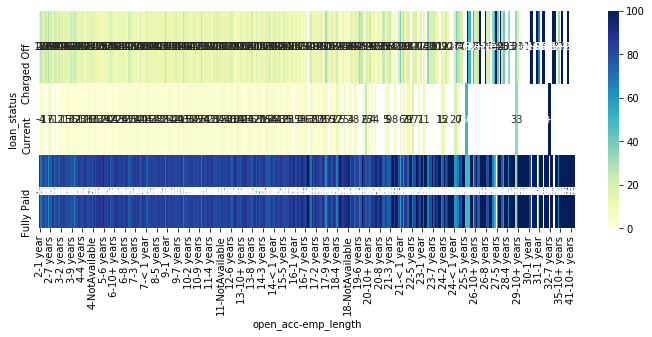

In [100]:
heat_map_bivariate(['open_acc', 'emp_length'])
# high num of accs with less experience is a risky proposition!

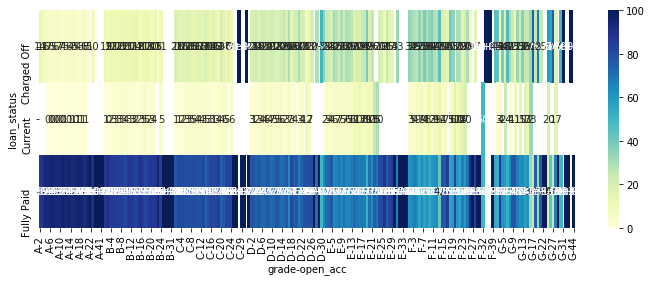

In [101]:
heat_map_bivariate(['grade', 'open_acc'])
# relatively safer with worse grades and less open accounts

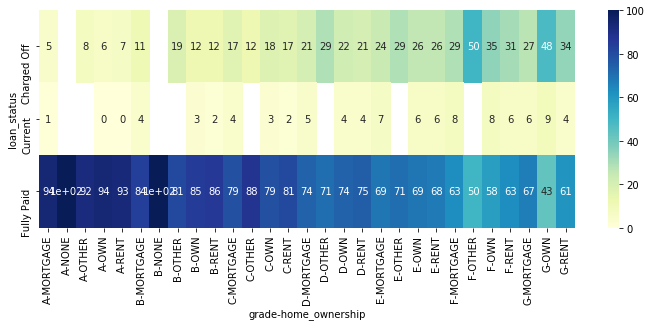

In [102]:
heat_map_bivariate(['grade', 'home_ownership'])
# G with own house is also risky

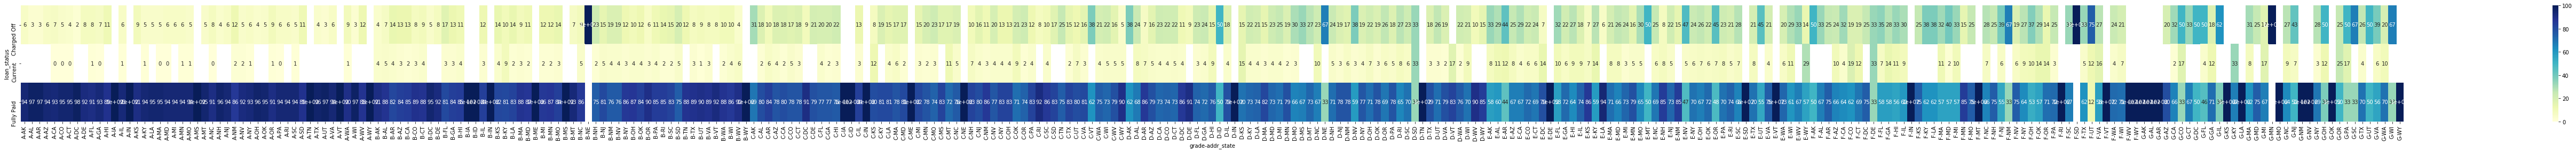

In [103]:
heat_map_bivariate(['grade', 'addr_state'], size=(100, 4))
# there are some states where good grades are also risky

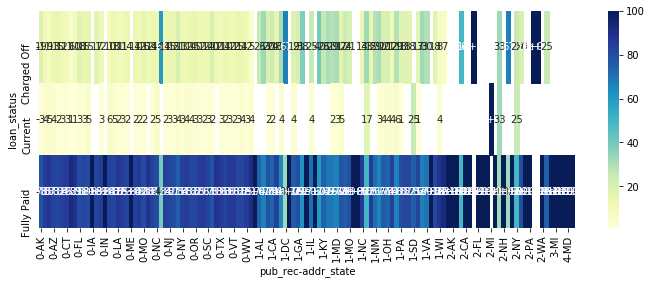

In [104]:
heat_map_bivariate(['pub_rec', 'addr_state'])
# nv with 0 records is also risky

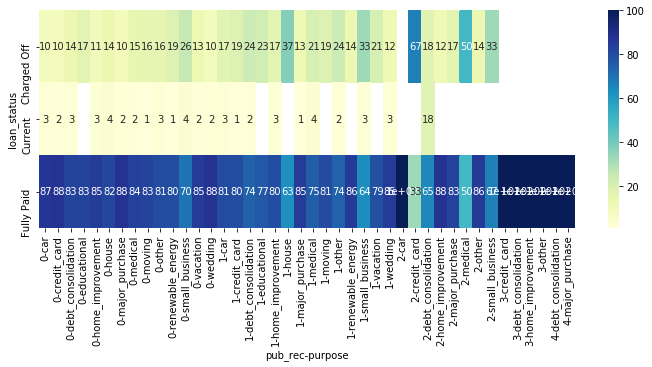

In [105]:
heat_map_bivariate(['pub_rec', 'purpose'])
# good indications here

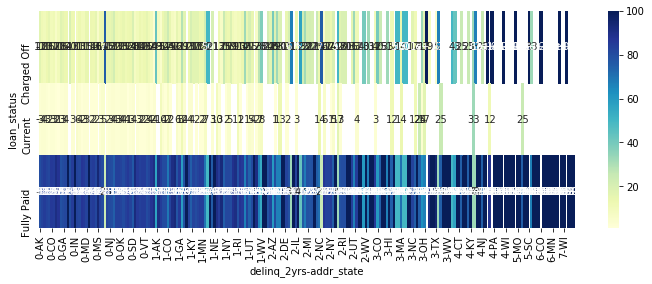

In [106]:
heat_map_bivariate(['delinq_2yrs', 'addr_state'])
# some state with even 0 delinquencies have high rate

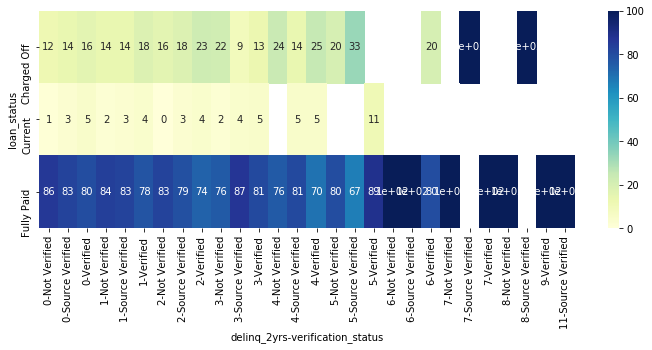

In [107]:
heat_map_bivariate(['delinq_2yrs', 'verification_status'])
# verified and source verified are higher risk for less number of delinquencies - fowl play?

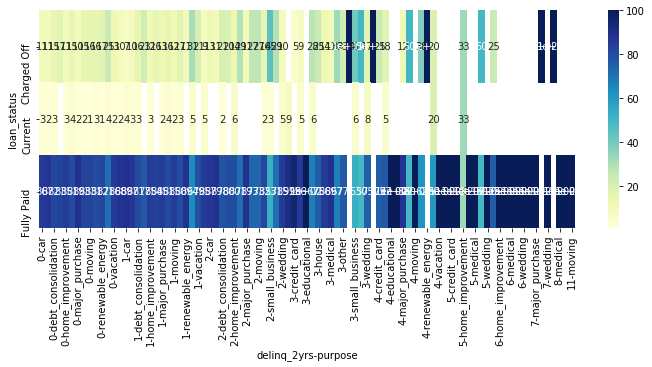

In [108]:
heat_map_bivariate(['delinq_2yrs', 'purpose'])
# even with higher delinquencies, there are some loan types which are safer

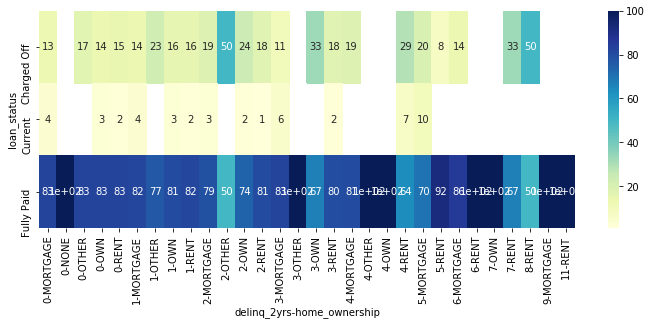

In [109]:
heat_map_bivariate(['delinq_2yrs', 'home_ownership'])
# others are at higher risk even with less delinq

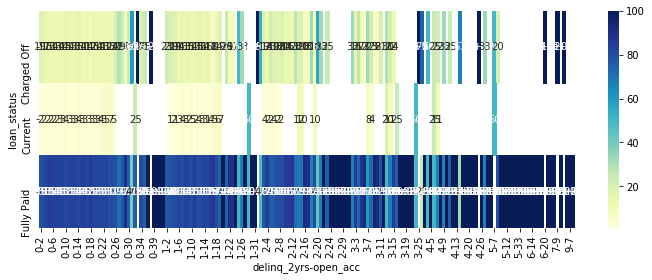

In [110]:
heat_map_bivariate(['delinq_2yrs', 'open_acc'])
# higher accs with low delinq also risky

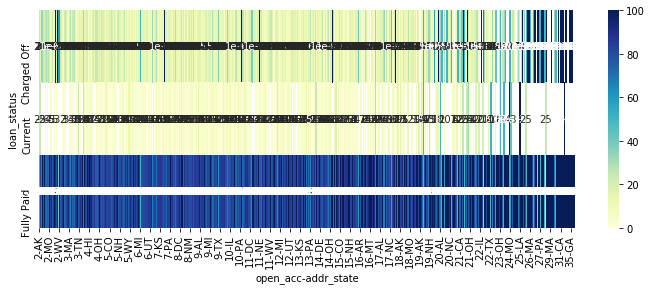

In [111]:
heat_map_bivariate(['open_acc', 'addr_state'])
# some states where large open acc is not much risk

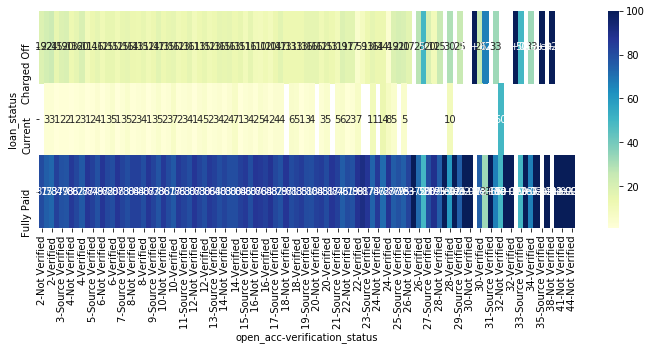

In [112]:
heat_map_bivariate(['open_acc', 'verification_status'])
# high num of accs and not verified is risky

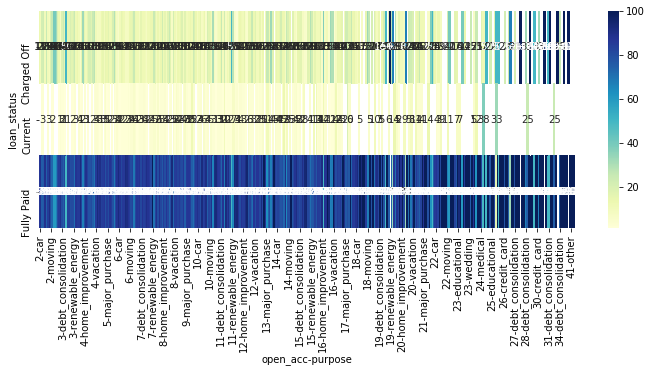

In [113]:
heat_map_bivariate(['open_acc', 'purpose'])
# some purposes where high open accs is less risky

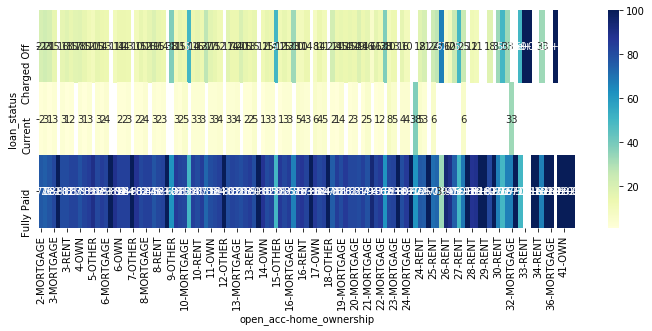

In [114]:
heat_map_bivariate(['open_acc', 'home_ownership'])

### Derived metrics